In [1]:
#import common modules
import numpy as np
from sklearn.model_selection import train_test_split

#import own modules
from source.matrix_creation import polynomial_features,scale_features_by_intercept_use,standard_scaler
from source.plotting_exploration import explore_eta,explore_n
from source.plotting_exploration import plot_mse,plot_r2
from source.plotting_exploration import explore_iterations_GD_methods_ridge,explore_iterations_GD_methods_OLS
from source.plotting_exploration import explore_n_epochs_stochasticGD_ridge,explore_n_epochs_stochasticGD_OLS

## Notebook for assignment 1 parts c,d

Generating analysis plots for assignement 1 parts c) and d) exploring Gradient descent for various methods for updating the learning rate. 

* Functions for the main methods can be found in source/GD_OLS.py and source/GD_Ridge.py
* Functions generating and scaling the feature matrix can be found in source/matrix_creation.py 
* Functions for calculating errors can be found in source/errors.py
* Functions for plotting and exploration can be found in source/plotting_exploration.py


### Setup for constants

In [2]:
# Runge's function - parameters to explore
n_datapoints = 1000
standard_deviation = 0.1 # for noise
p = 15 # polynomial degree


max_iterations = 1000

use_intercept = True 
create_plots = False
verbose_bool = False
save_plots = True

np.random.seed(250)  # ensure reproducibility numpy
random_state_int = 42   # ensure reproducibility train_test_split

#### Constants for analysis

In [3]:
eta_list = [0.00001,0.0001,0.001, 0.01, 0.1,0.12,0.121] 
new_etas = []
num_iters = 1000

iter_list = [10,50,100,1000,10000,100000]
eta = 0.001
lam = 0.01

### Generate Runge's function data

#### No noise

In [4]:
# generating data without noise
x = np.linspace(-1, 1, num=n_datapoints)
y = 1 / (1 + 25 * x**2)

#### With noise

In [5]:
# generating data with noise
x_noise = x
y_noise = 1 / (1 + 25 * x_noise**2) + np.random.normal(0, standard_deviation, n_datapoints)

### Generate feature matrix, scale and split into training and test data

#### No noise

In [6]:
# creating design matrix with polynomial features: p
X = polynomial_features(x, p,intercept=use_intercept) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. 

# split x for plotting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state_int)
# test and train dataset, and scaling of X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_int)
X_train_scaled, X_test_scaled, X_train_mean, X_train_std = scale_features_by_intercept_use(X_train, X_test, use_intercept)
# scaling of y_train and y_test
y_train_scaled, y_test_scaled, y_train_mean, y_train_std = standard_scaler(y_train, y_test)

#### With noise

In [7]:
# creating design matrix with polynomial features: p
X_noise = polynomial_features(x_noise, p,intercept=use_intercept) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. Leaving intercept out since Ridge regression handles this

# test and train dataset, and scaling of X_train and X_test
x_train_noise, x_test_noise, y_train_noise, y_test_noise = train_test_split(x_noise, y_noise, test_size=0.2, random_state=random_state_int)
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_noise, y_noise, test_size=0.2, random_state = random_state_int)
X_train_scaled_noise, X_test_scaled_noise, X_mean, X_std = scale_features_by_intercept_use(X_train_noise, X_test_noise, use_intercept)
# scaling of y_train and y_test
y_train_scaled_noise, y_test_scaled_noise, y_train_mean_noise, y_train_std_noise = standard_scaler(y_train_noise, y_test_noise)

### Analysis

#### Explore Gradient descent using OLS & Ridge for various eta, with no noise

In [8]:
import matplotlib.pyplot as plt

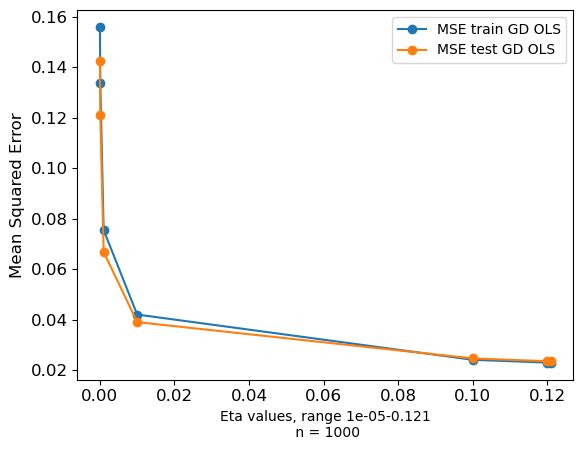

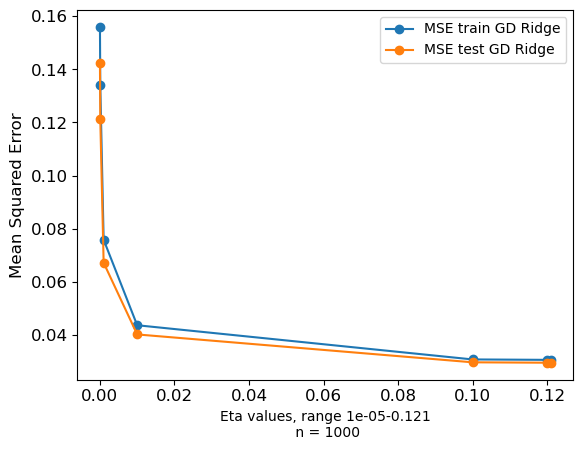

In [15]:
fname_mse_gd_ols = "gd_mse_ols_no_noise.png"
fname_ridge_gd_ols = "gd_mse_ridge_no_noise.png"

etas,mse_train_gdOLS,mse_test_gdOLS,mse_train_gdRidge,mse_test_gdRidge,r2_train_gdOLS,r2_test_Ridge = explore_eta(X_train,X_test,y_train,y_test,num_iters,eta_list,lam,verbose=False)

plot_mse("GD OLS",n_datapoints, etas, mse_train_gdOLS, mse_test_gdOLS,f"Eta values, range {etas[0]}-{etas[-1]}\n n = {n_datapoints}",fname=fname_mse_gd_ols,save=save_plots)
plot_mse("GD Ridge",n_datapoints, etas, mse_train_gdRidge, mse_test_gdRidge,f"Eta values, range {etas[0]}-{etas[-1]}\n n = {n_datapoints}",fname=fname_ridge_gd_ols,save=save_plots)


#### Explore Gradient descent using OLS & Ridge for various eta, with noise

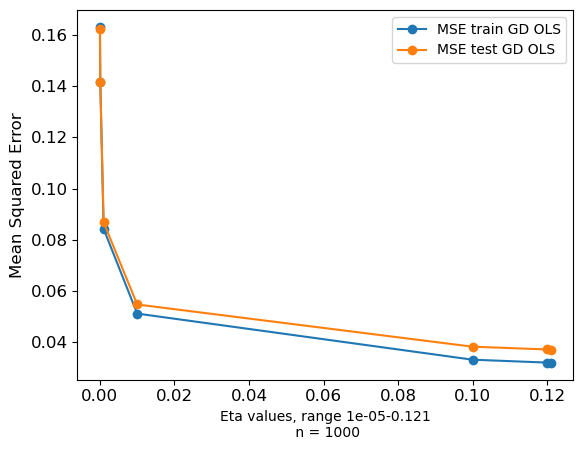

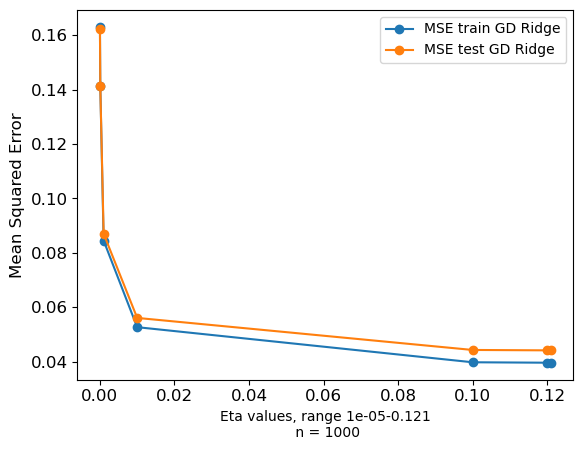

In [19]:
fname_mse_gd_ols_no = "gd_mse_ols_noise.png"
fname_mse_gd_ridge_no = "gd_mse_ridge_noise.png"

etas,mse_train_gdOLS,mse_test_gdOLS,mse_train_gdRidge,mse_test_gdRidge,r2_train_gdOLS,r2_test_Ridge = explore_eta(X_train_noise,X_test_noise,y_train_noise,y_test_noise,num_iters,eta_list,lam,verbose=False)

plot_mse("GD OLS",n_datapoints, etas, mse_train_gdOLS, mse_test_gdOLS,f"Eta values, range {etas[0]}-{etas[-1]}\n n = {n_datapoints}",fname=fname_mse_gd_ols_no,save=save_plots)
plot_mse("GD Ridge",n_datapoints, etas, mse_train_gdRidge, mse_test_gdRidge,f"Eta values, range {etas[0]}-{etas[-1]}\n n = {n_datapoints}",fname=fname_mse_gd_ridge_no,save=save_plots)


#### Explore Gradient descent using OLS & Ridge for various number of iterations, with no noise

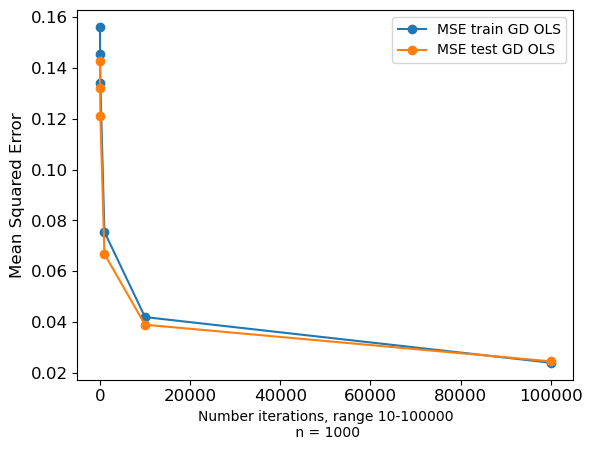

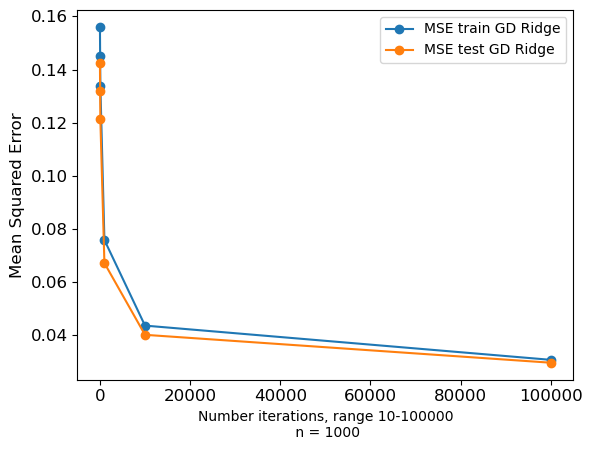

In [18]:
fname_mse_gd_ols = "gd_mse_n_ols_no_noise.png"
fname_mse_gd_ridge = "gd_mse_n_ridge_no_noise.png"

iters,mse_train_gdOLS,mse_test_gdOLS,mse_train_gdRidge,mse_test_gdRidge,r2_train_gdOLS,r2_test_gdRidge = explore_n(X_train,X_test,y_train,y_test,iter_list,lam,eta,verbose=False)

plot_mse("GD OLS",n_datapoints, iters, mse_train_gdOLS, mse_test_gdOLS,f"Number iterations, range {iters[0]}-{iters[-1]}\n n = {n_datapoints}",fname=fname_mse_gd_ols,save=save_plots)
plot_mse("GD Ridge",n_datapoints, iters, mse_train_gdRidge, mse_test_gdRidge,f"Number iterations, range {iters[0]}-{iters[-1]}\n n = {n_datapoints}",fname=fname_mse_gd_ridge,save=save_plots)


#### Explore Gradient descent using OLS & Ridge for various number of iterations, with noise

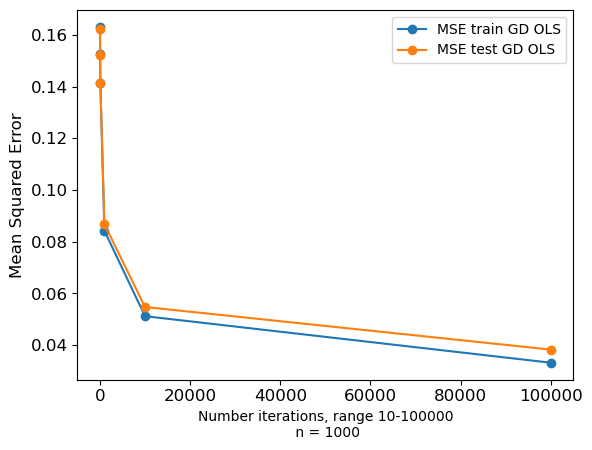

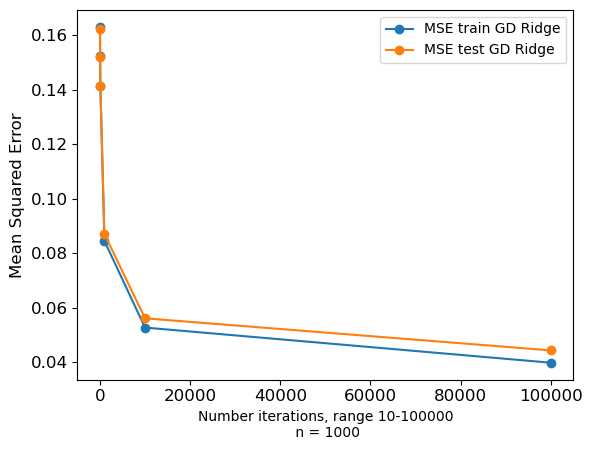

In [21]:
fname_mse_gd_ols_no = "gd_mse_n_ols_noise.png"
fname_mse_gd_ridge_no = "gd_mse_n_ridge_noise.png"

iters,mse_train_gdOLS,mse_test_gdOLS,mse_train_gdRidge,mse_test_gdRidge,r2_train_gdOLS,r2_test_gdRidge = explore_n(X_train_noise,X_test_noise,y_train_noise,y_test_noise,iter_list,lam,eta,verbose=False)

plot_mse("GD OLS",n_datapoints, iters, mse_train_gdOLS, mse_test_gdOLS,f"Number iterations, range {iters[0]}-{iters[-1]}\n n = {n_datapoints}",fname=fname_mse_gd_ols_no,save=save_plots)
plot_mse("GD Ridge",n_datapoints, iters, mse_train_gdRidge, mse_test_gdRidge,f"Number iterations, range {iters[0]}-{iters[-1]}\n n = {n_datapoints}",fname=fname_mse_gd_ridge_no,save=save_plots)

#### Explore Gradient descent using OLS, with different ways of updating the learning rate, for various number of iterations, with no noise

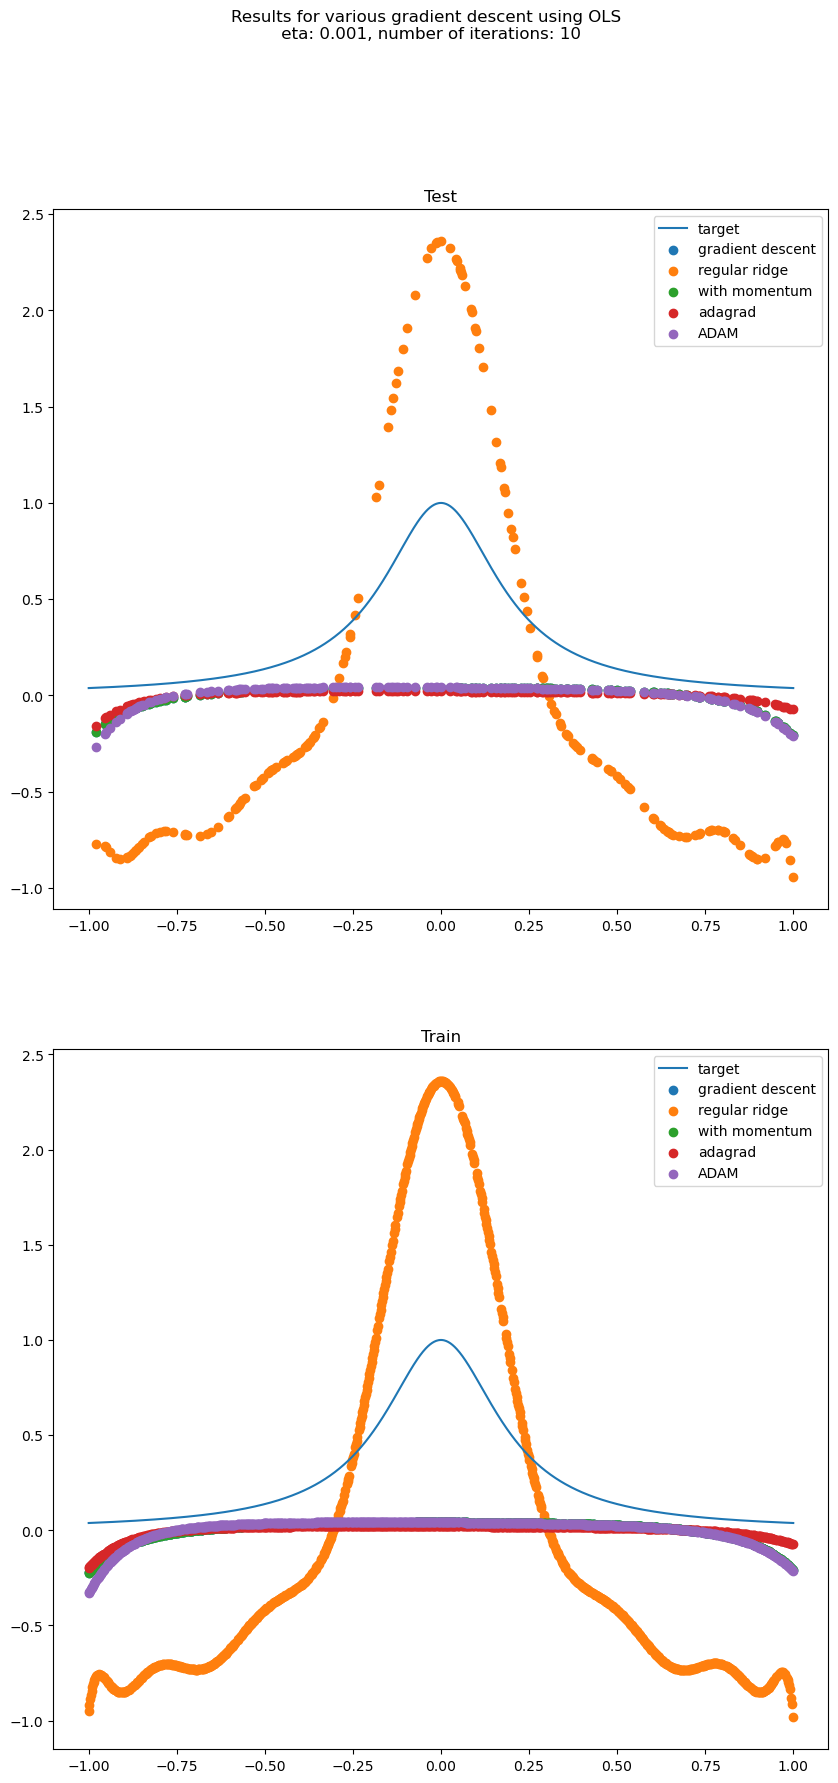

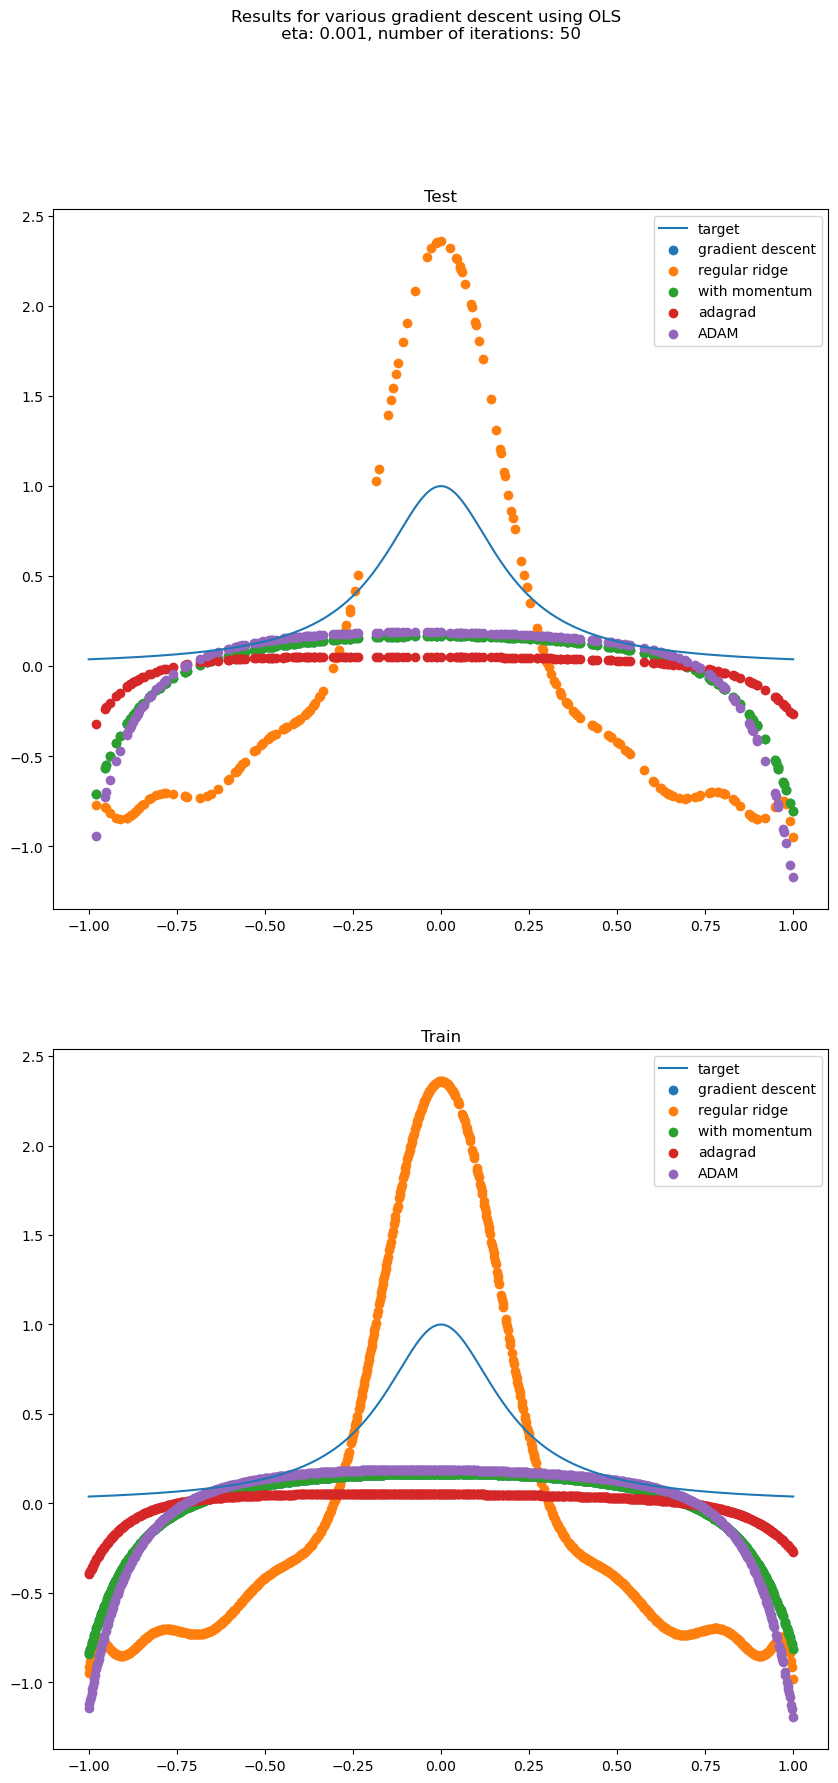

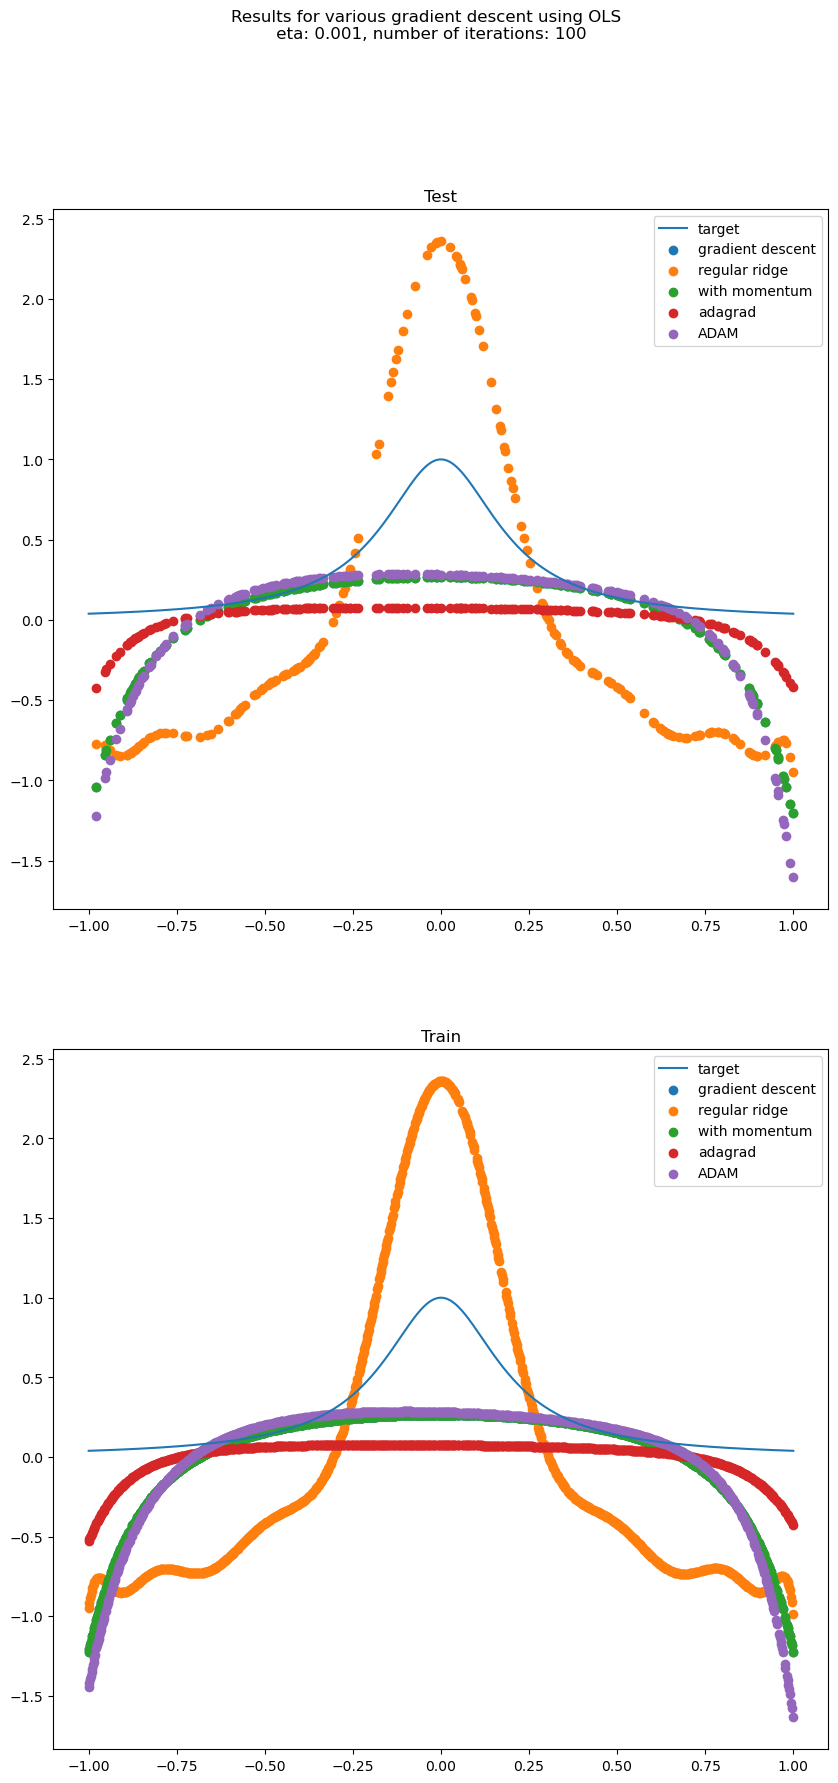

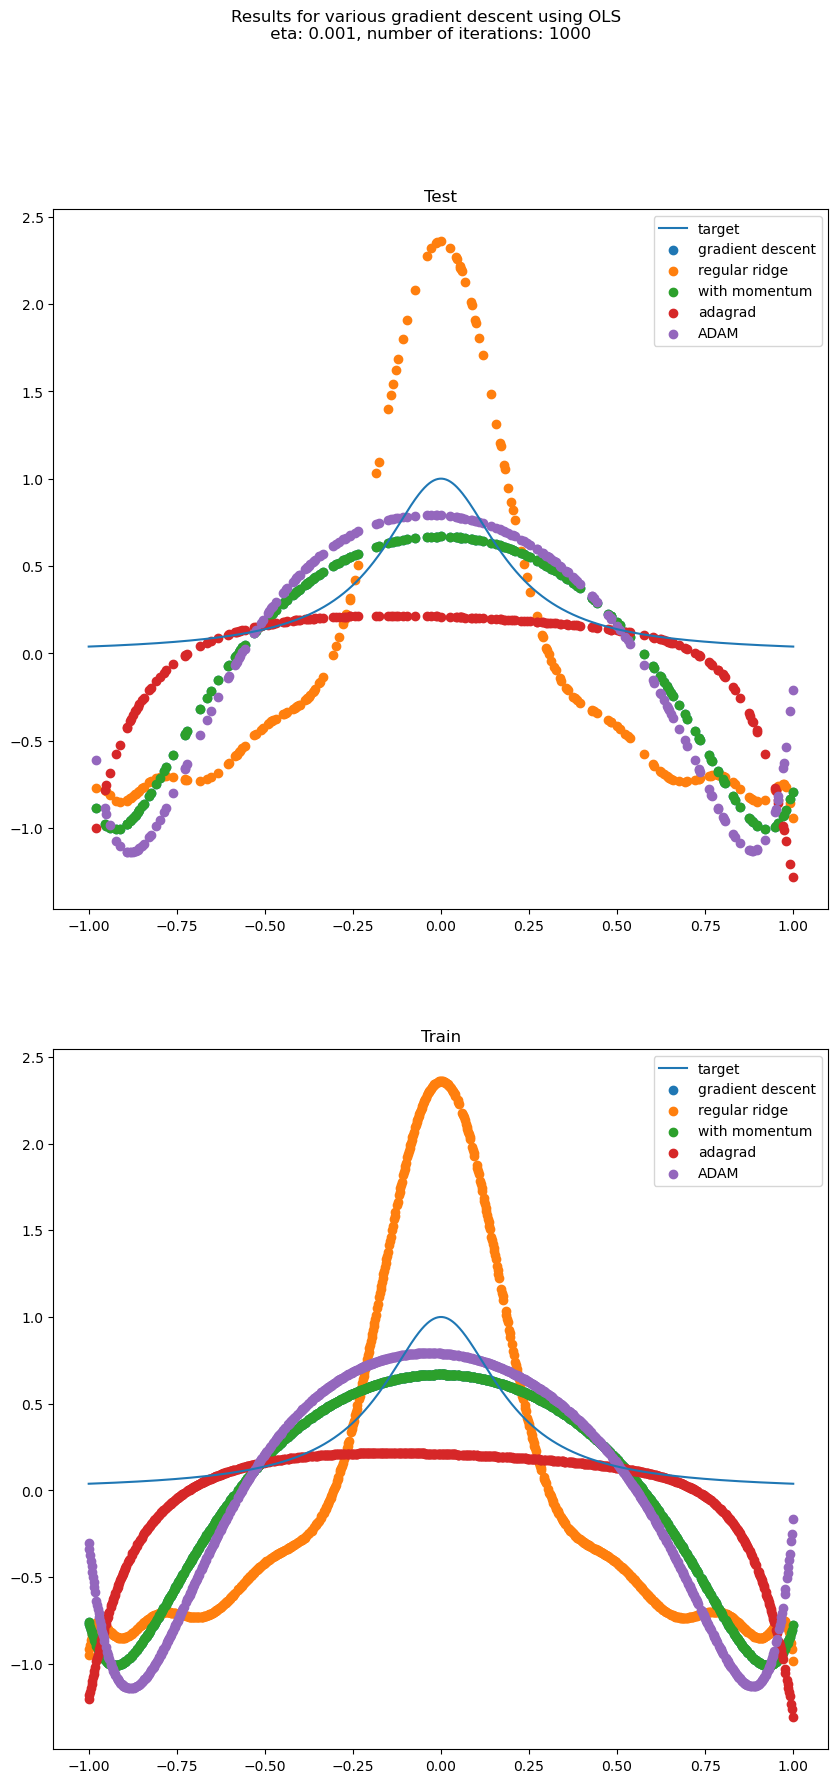

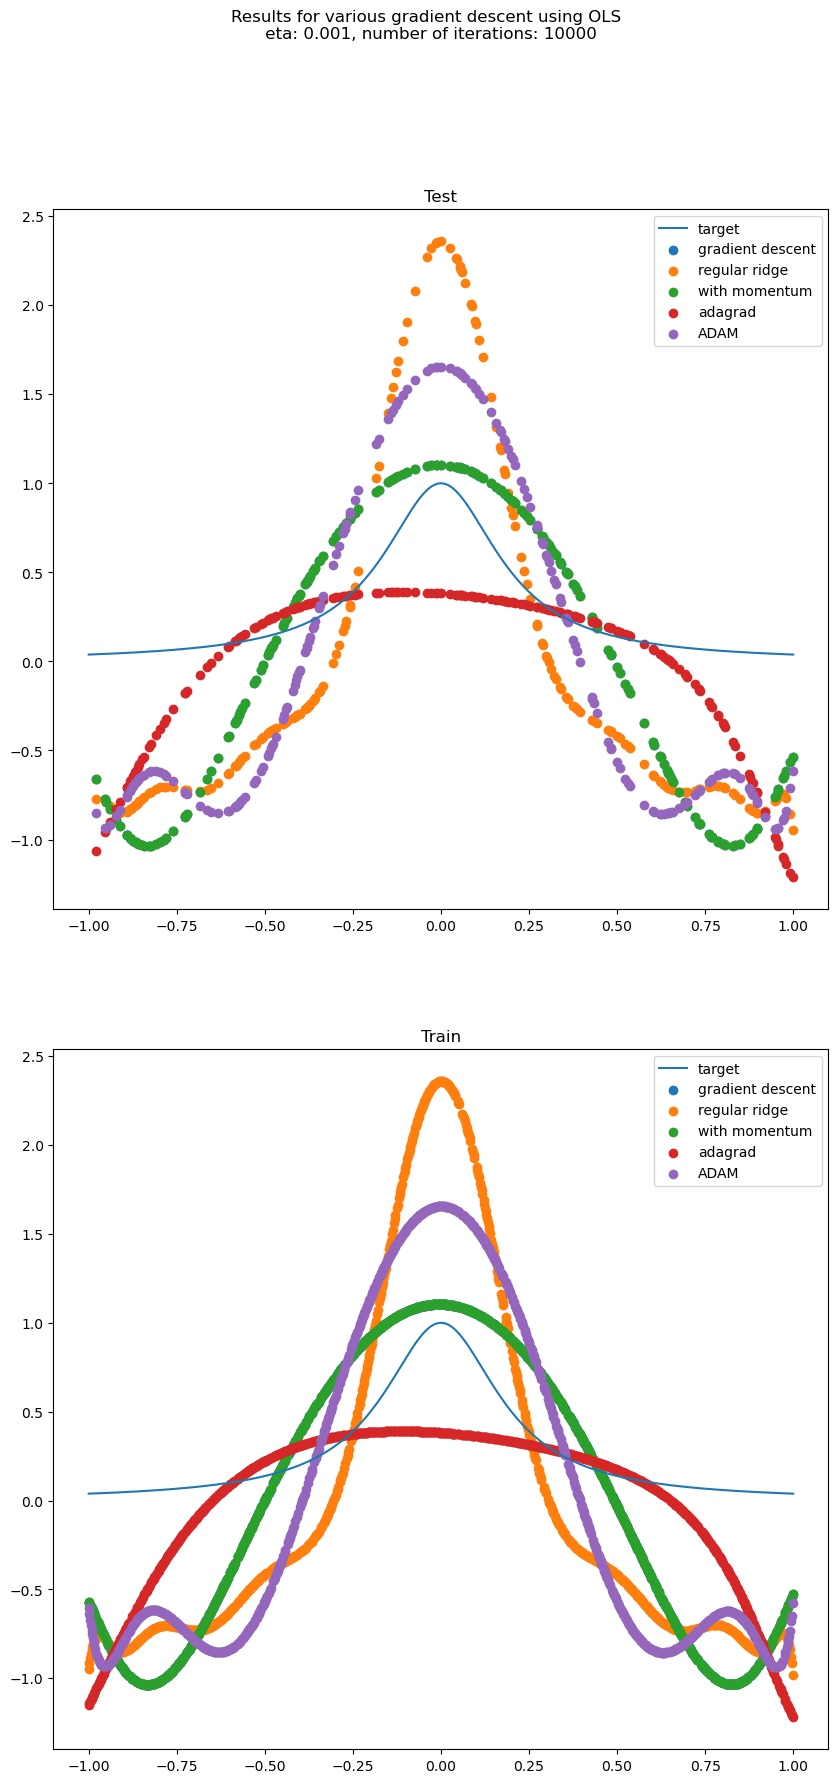

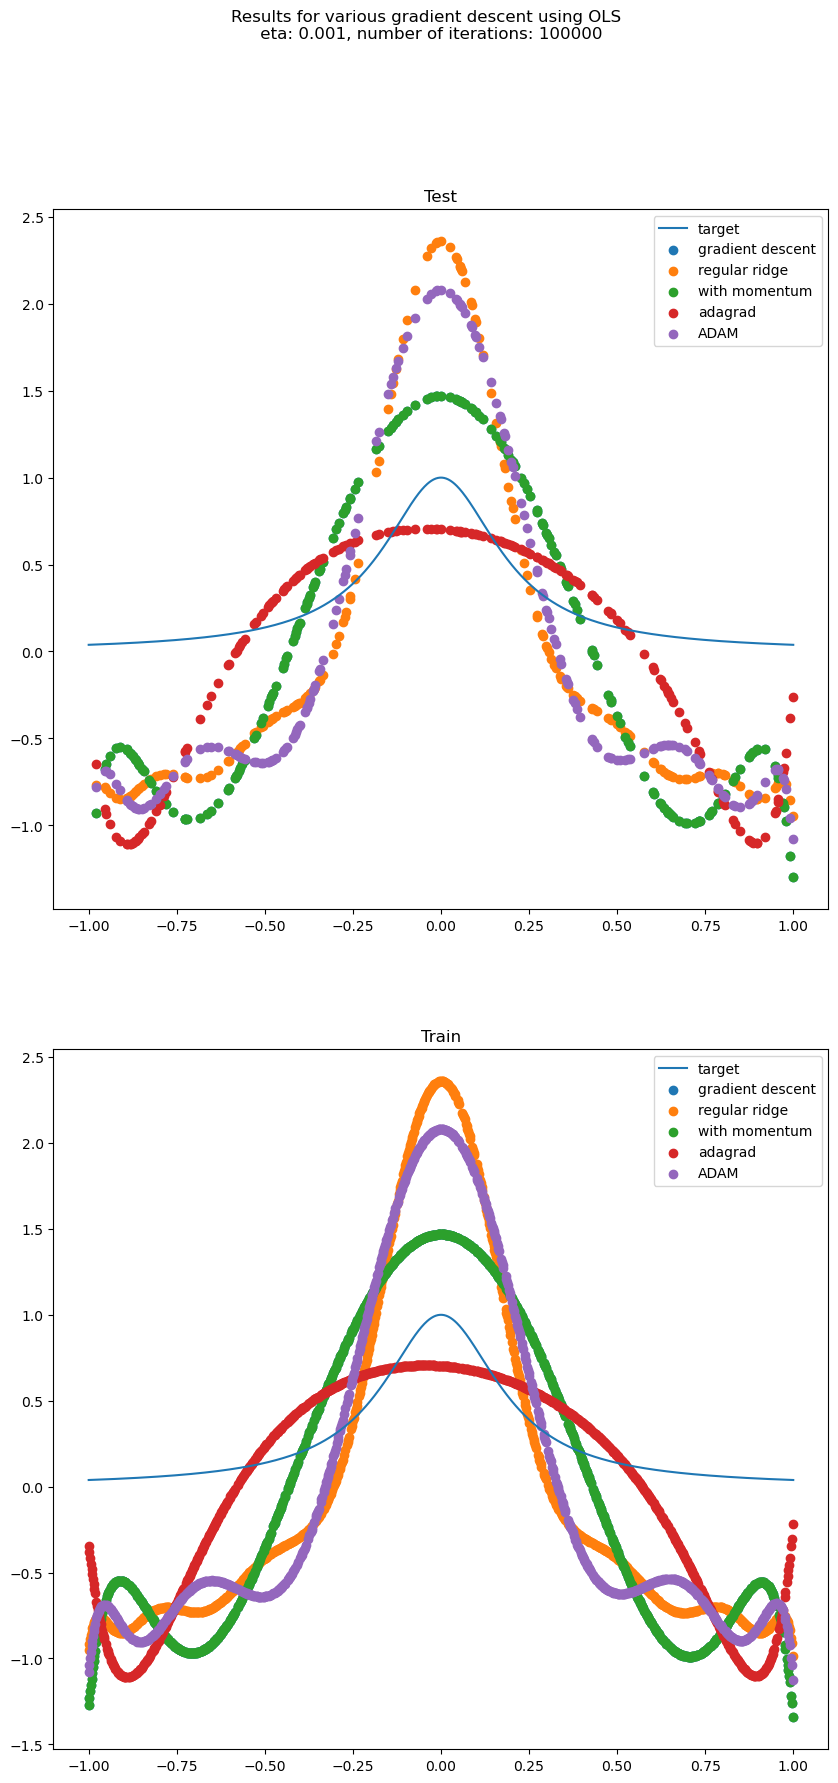

In [22]:
explore_iterations_GD_methods_OLS(iter_list,eta,
                                  x,y,
                                  x_train,x_test,
                                  X_train_scaled,X_test_scaled,
                                  y_train_scaled)

#### Explore Gradient descent using OLS, with different ways of updating the learning rate, for various number of iterations, with noise

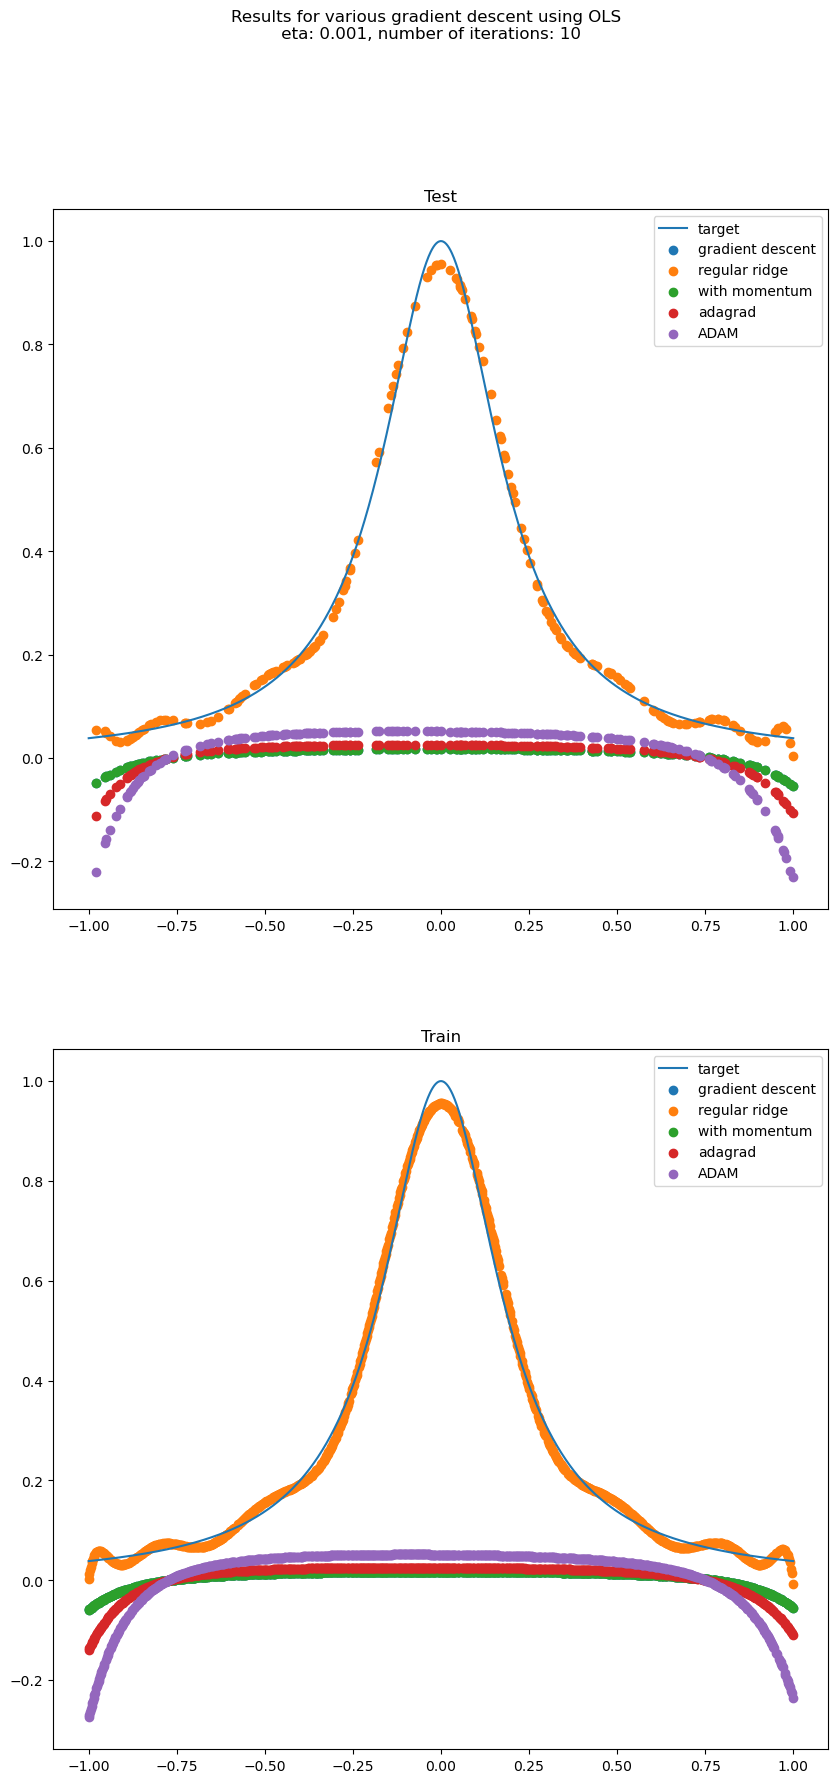

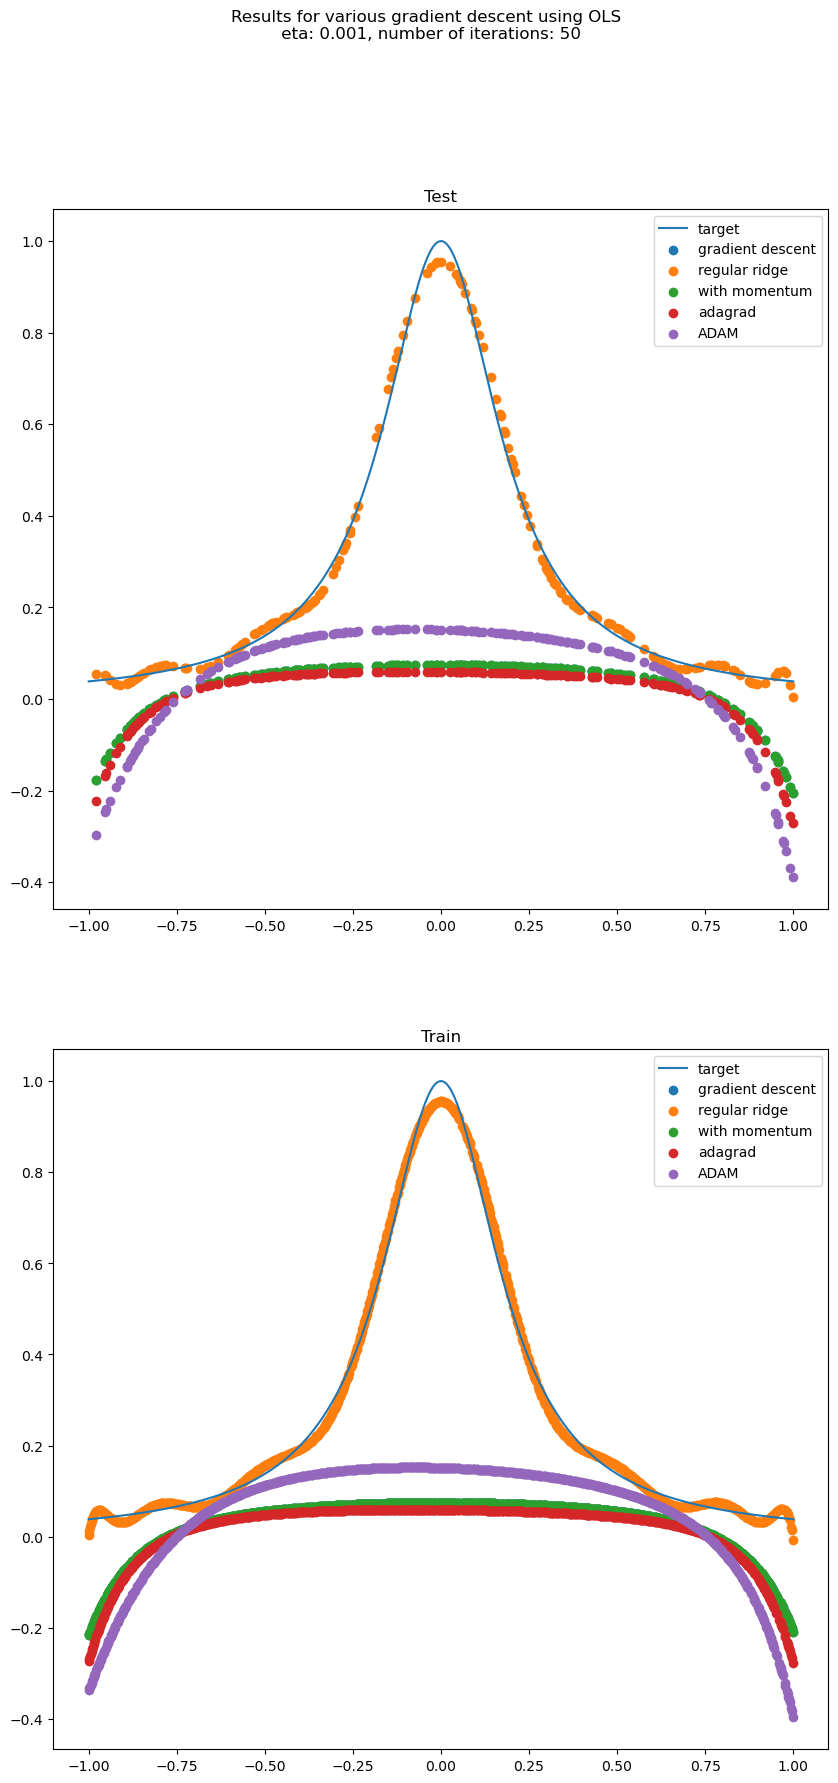

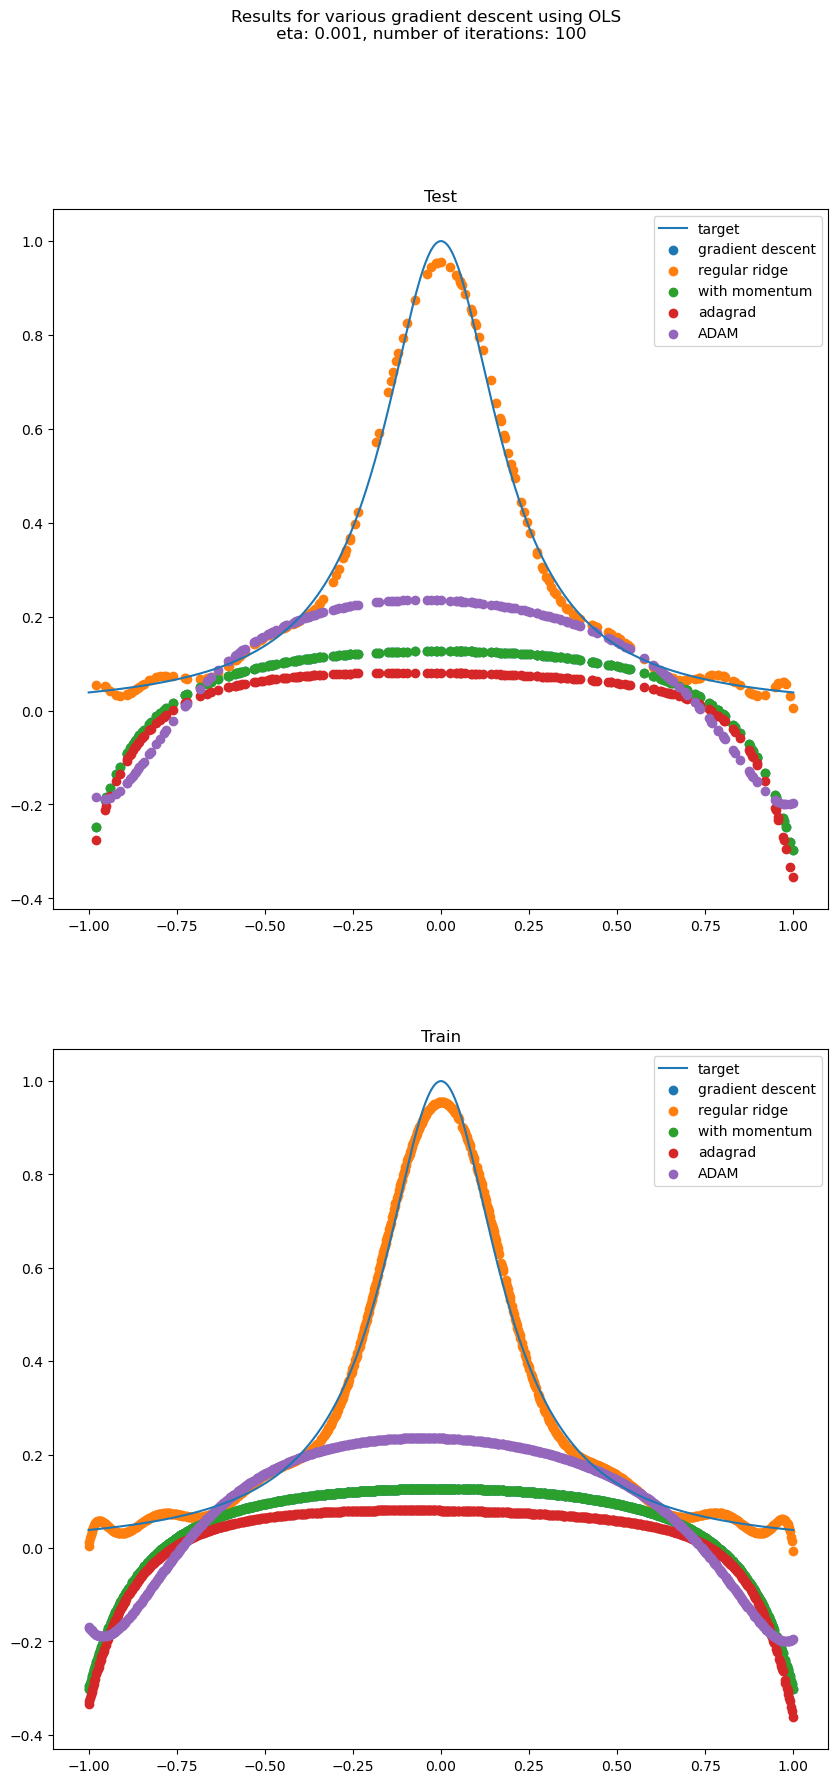

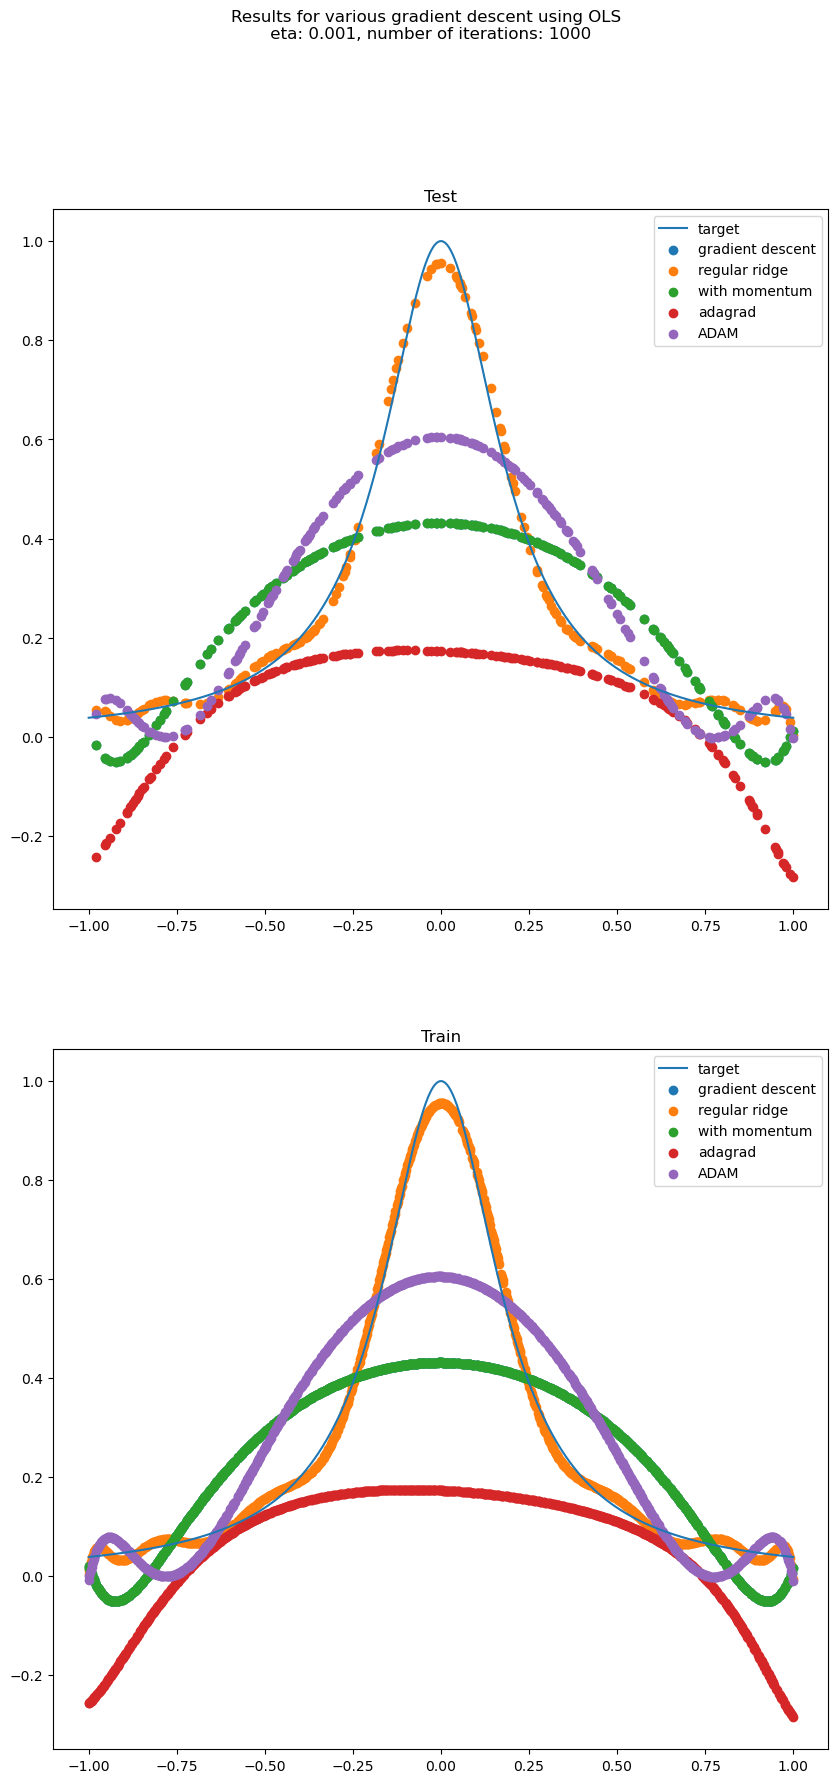

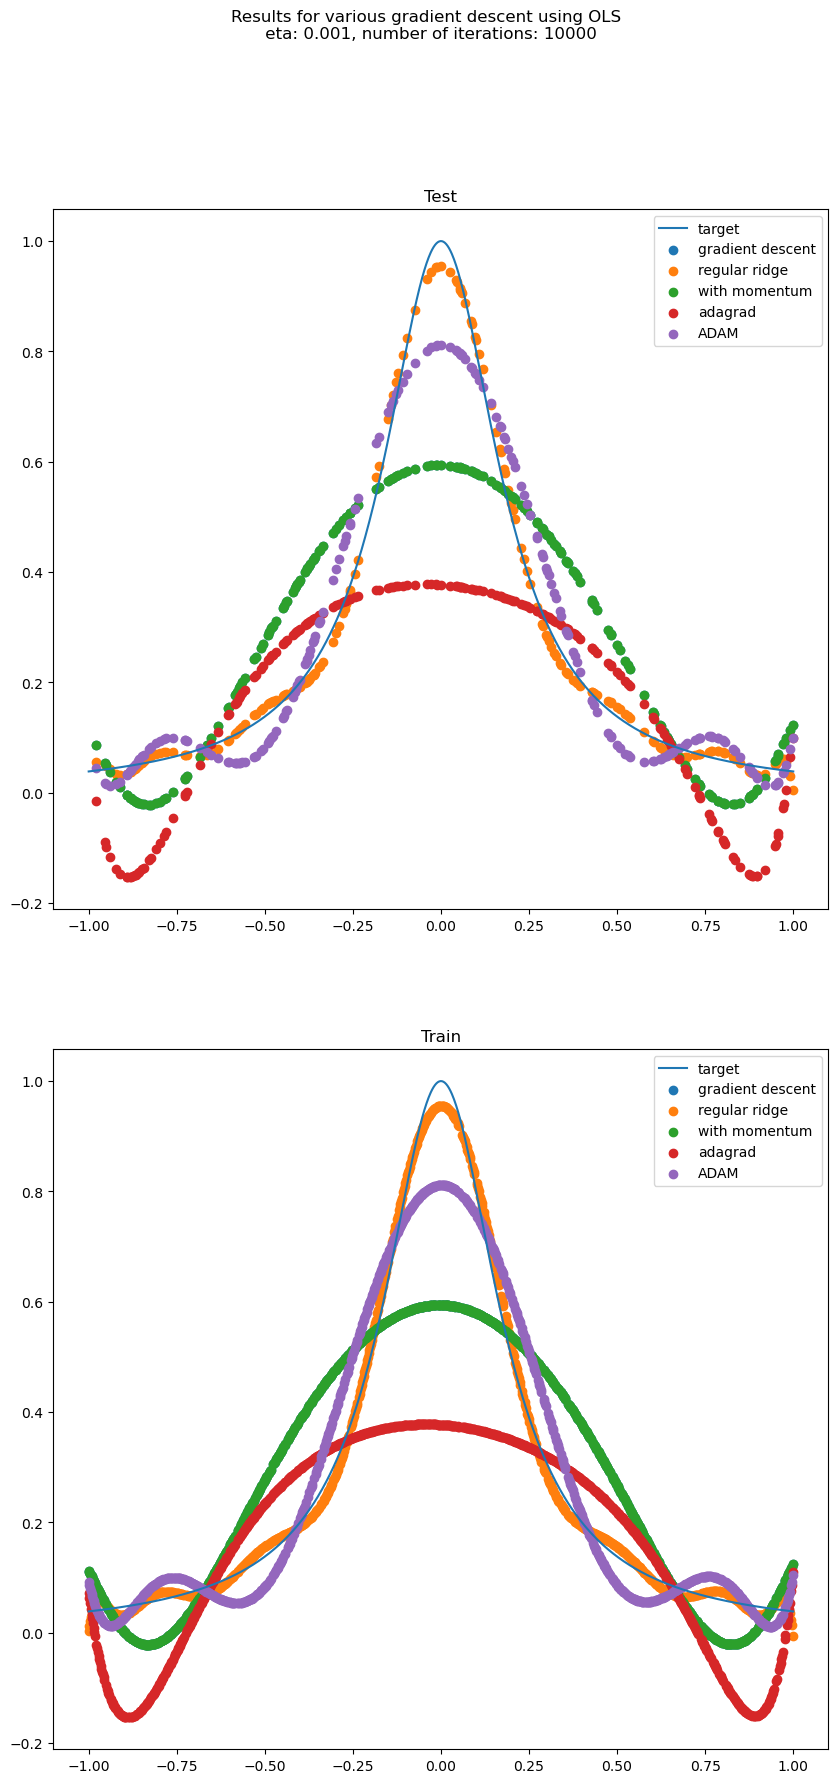

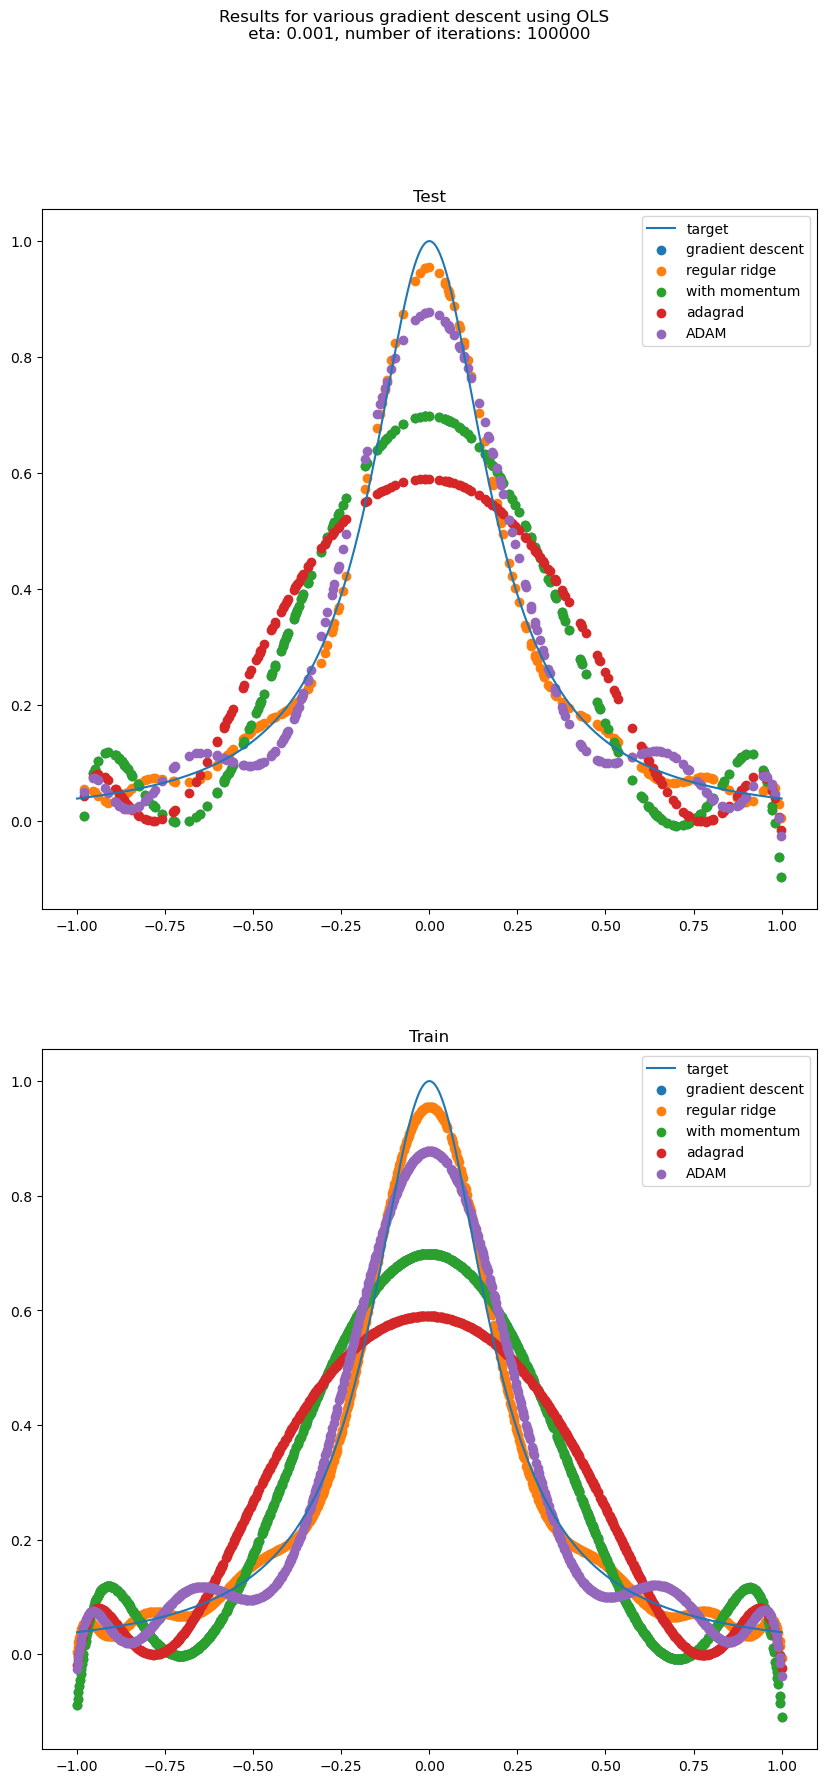

In [23]:
explore_iterations_GD_methods_OLS(iter_list,eta,
                                  x,y,
                                  x_train,x_test,
                                  X_train_scaled,X_test_scaled,
                                  y_train)

#### Explore Gradient descent using ridge regression, with different ways of updating the learning rate, for various number of iterations, with no noise

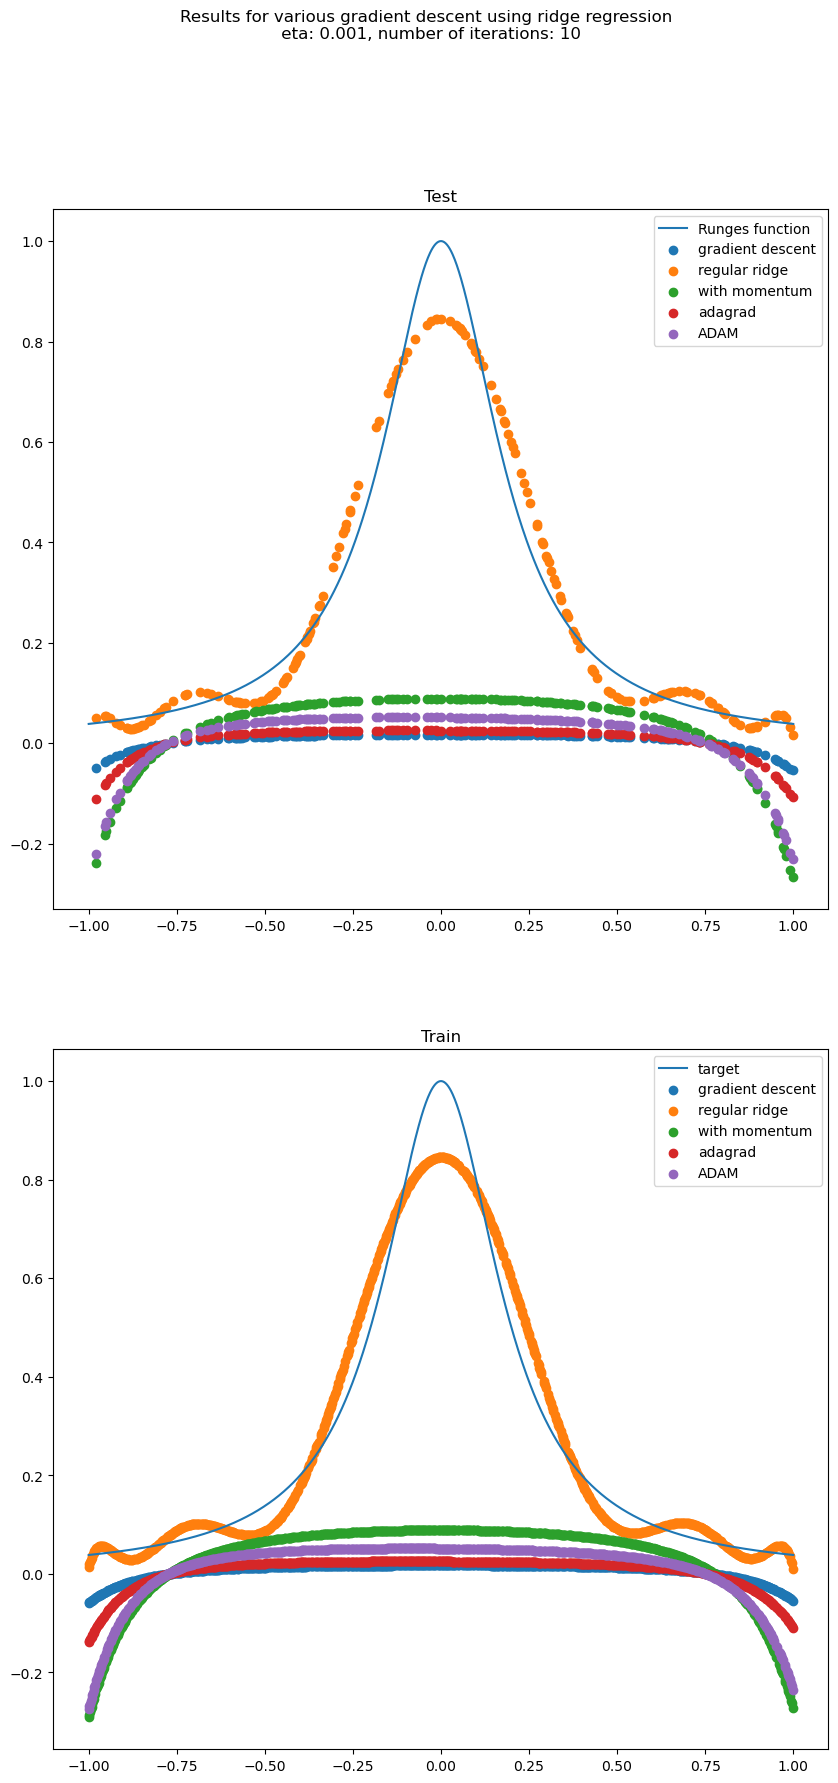

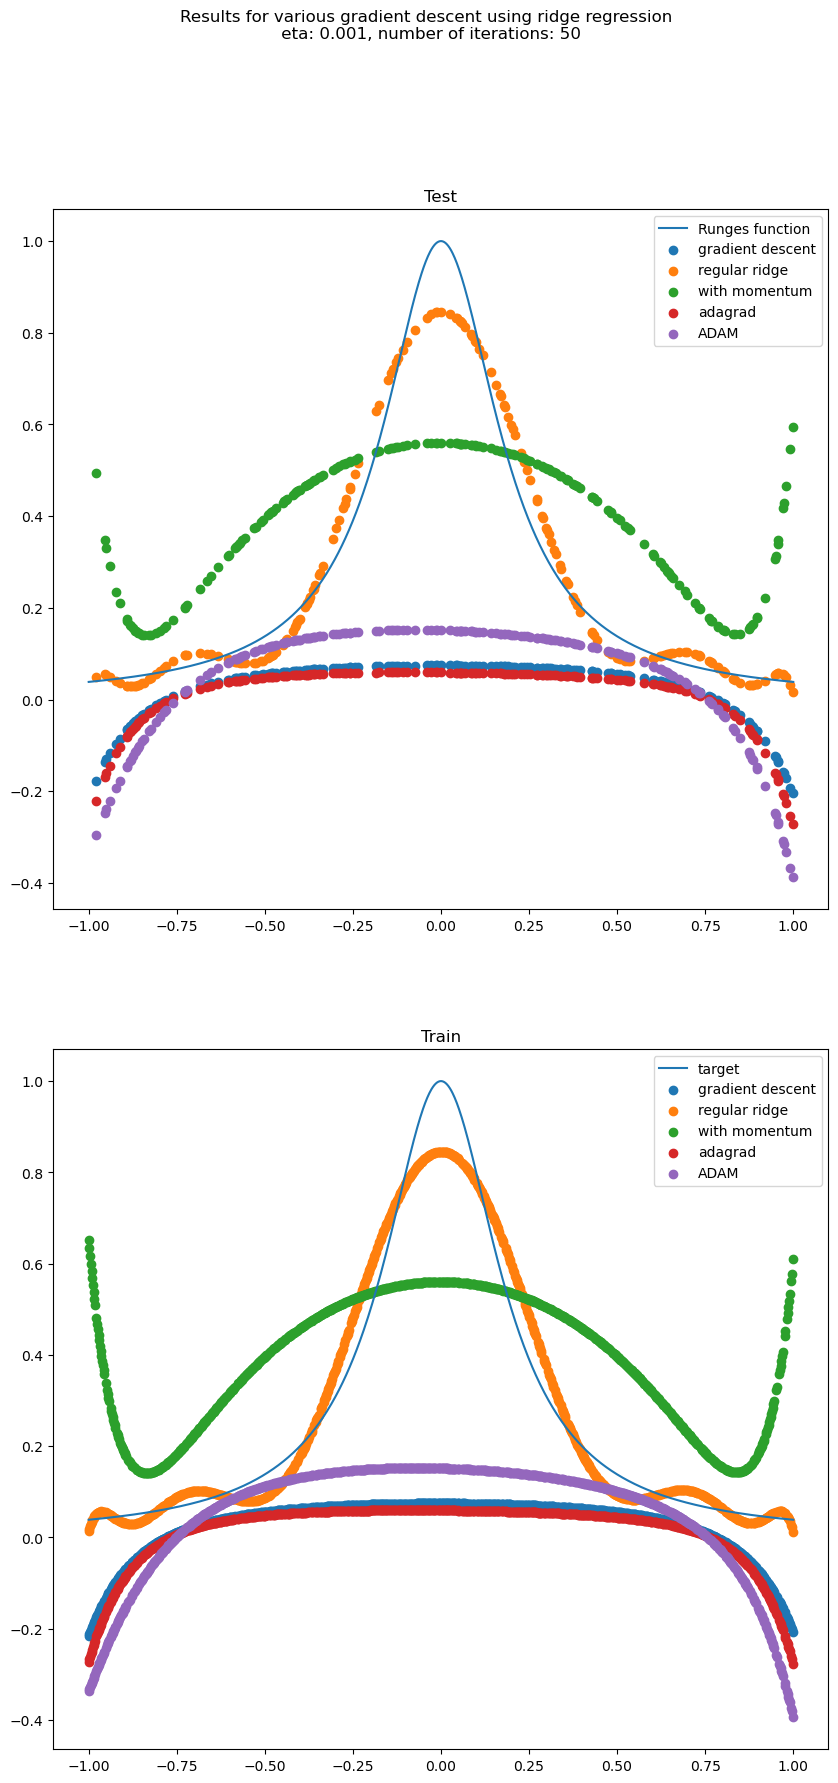

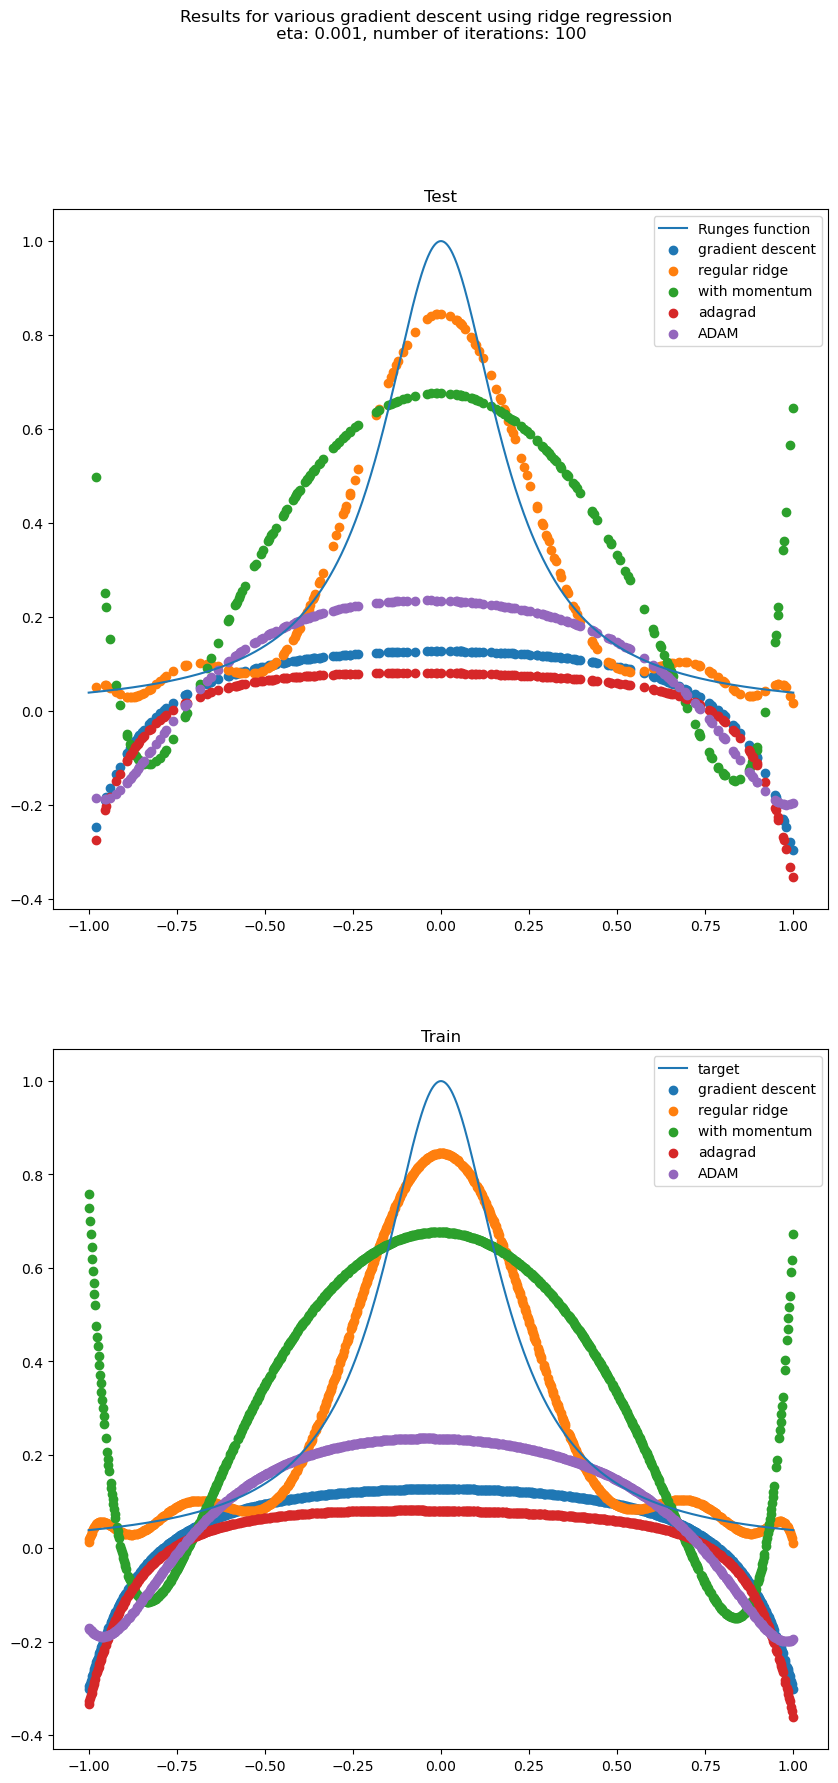

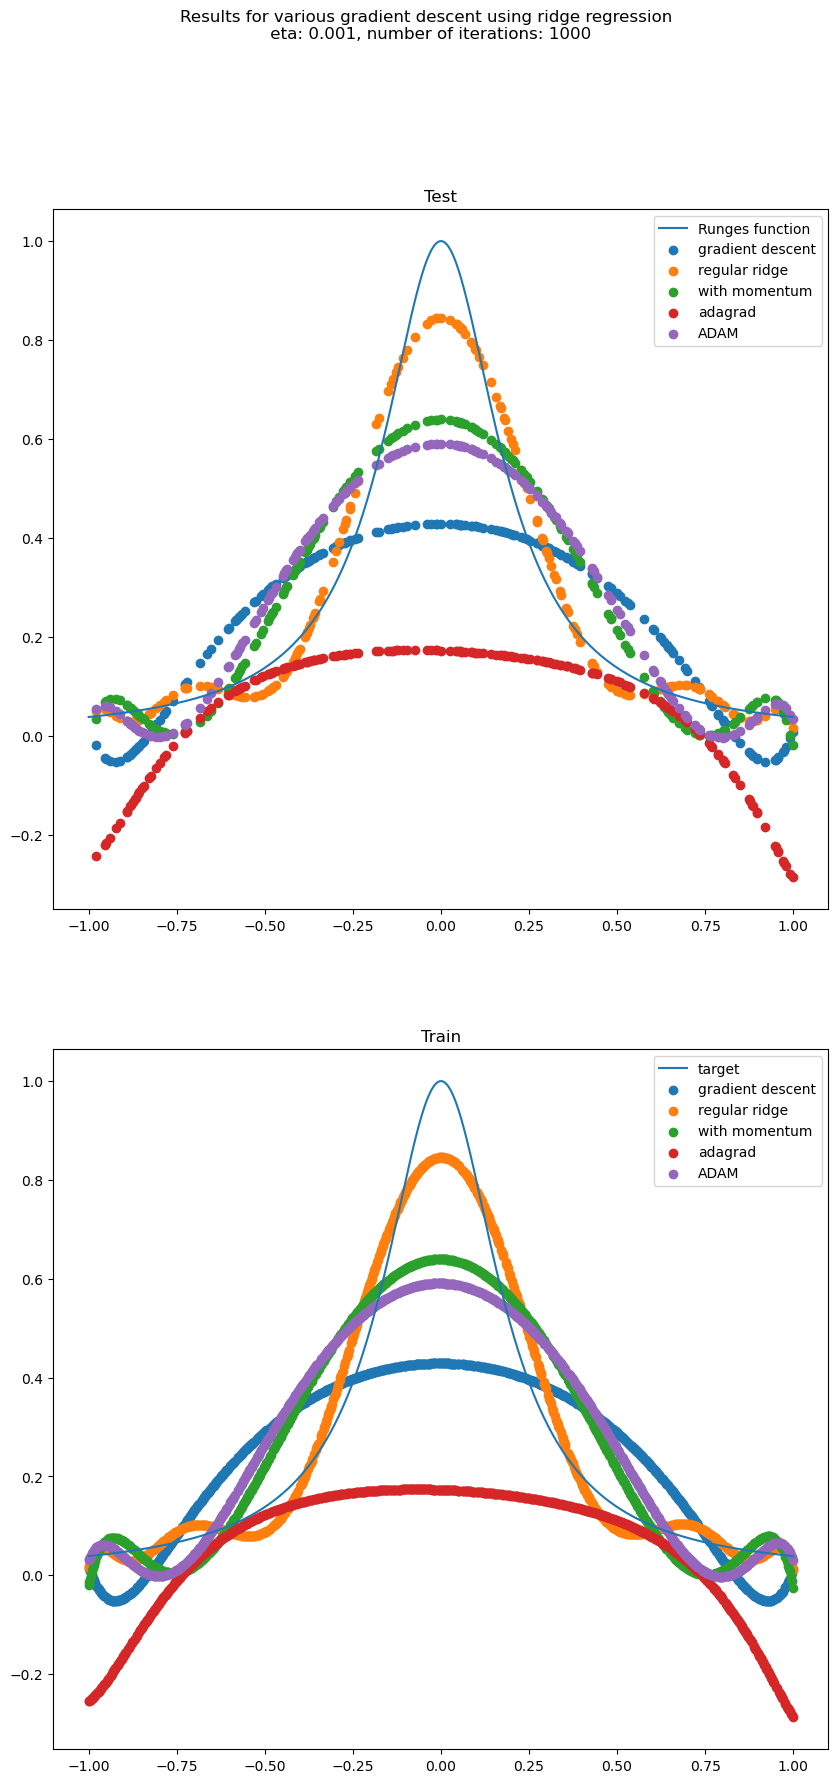

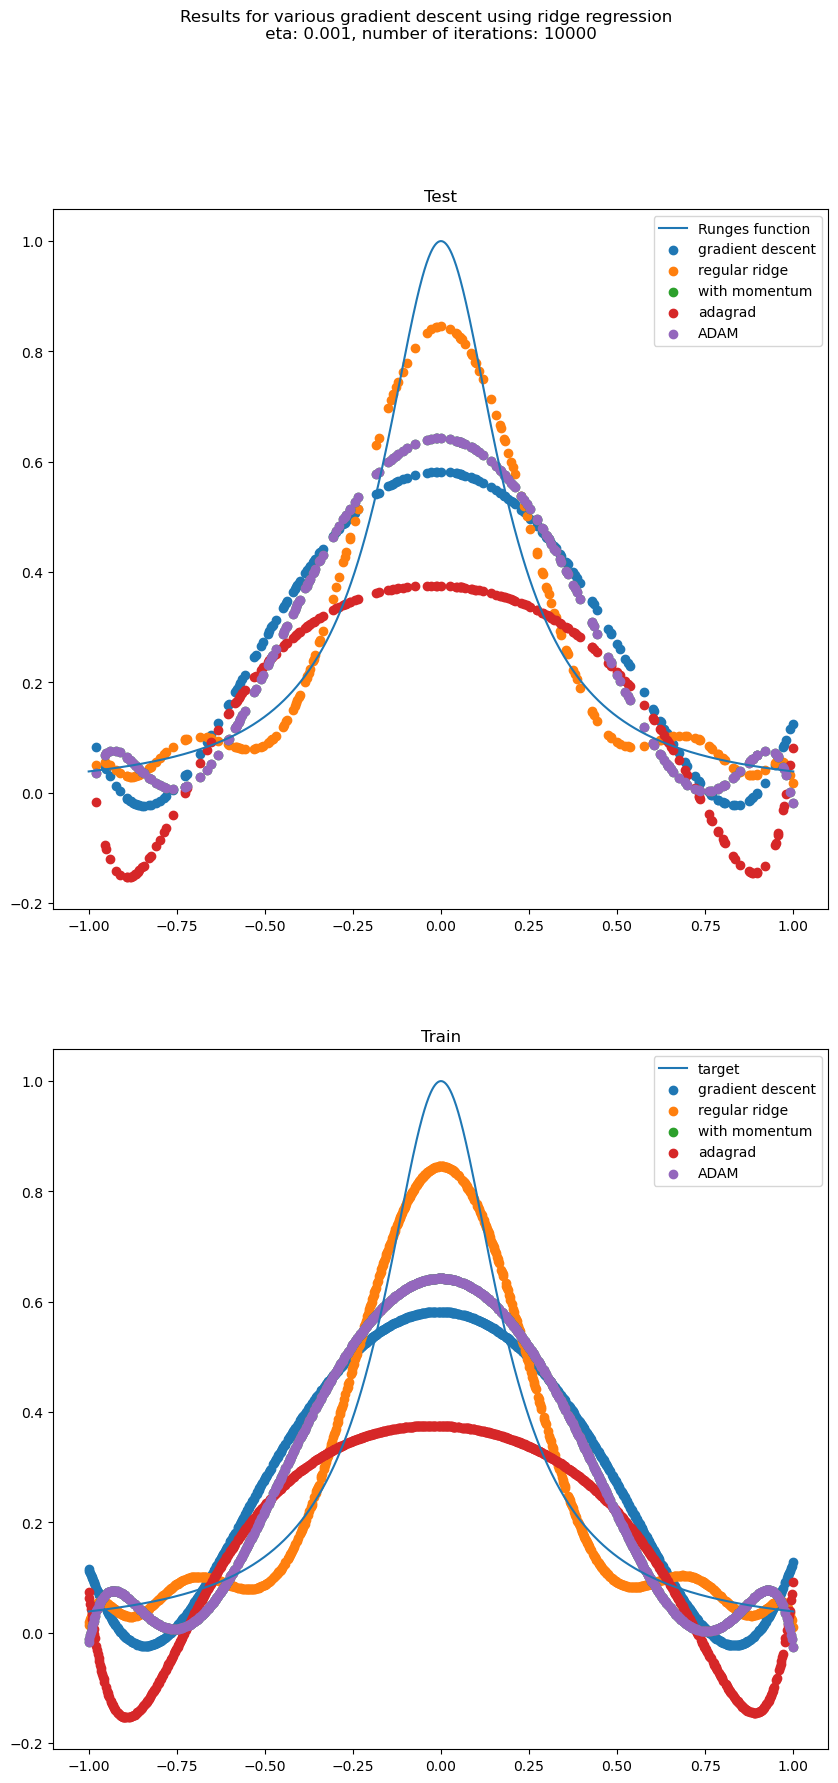

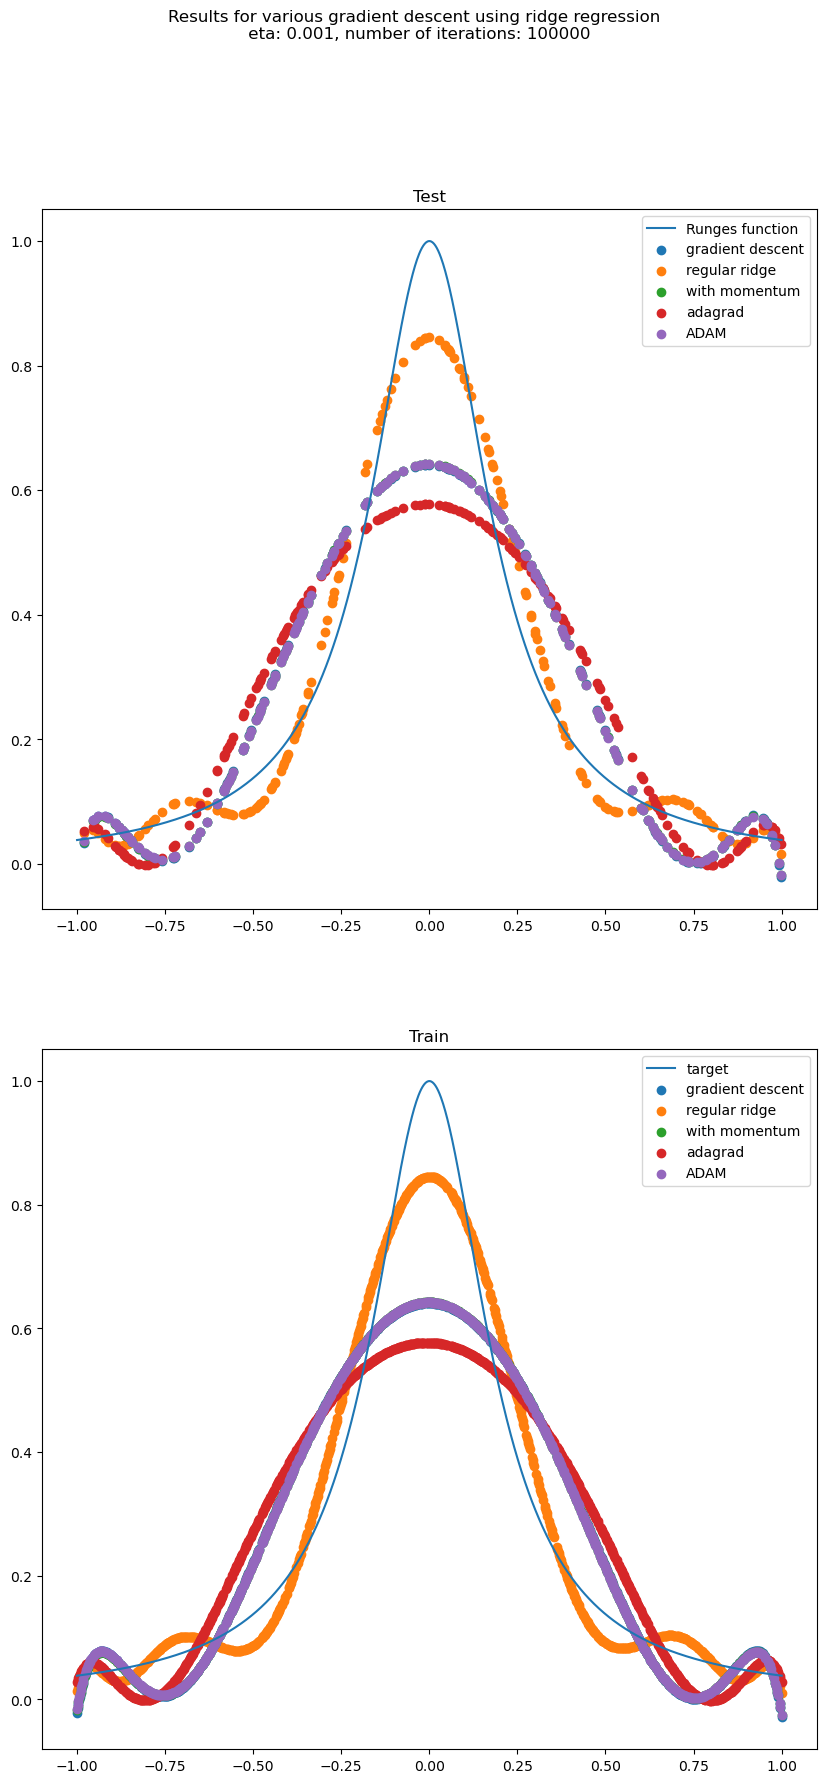

In [24]:
explore_iterations_GD_methods_ridge(iter_list,eta,lam,
                                    x,y,
                                    x_train,x_test,
                                    X_train_scaled,X_test_scaled,
                                    y_train)

#### Explore Gradient descent using ridge regression, with different ways of updating the learning rate, for various number of iterations, with noise

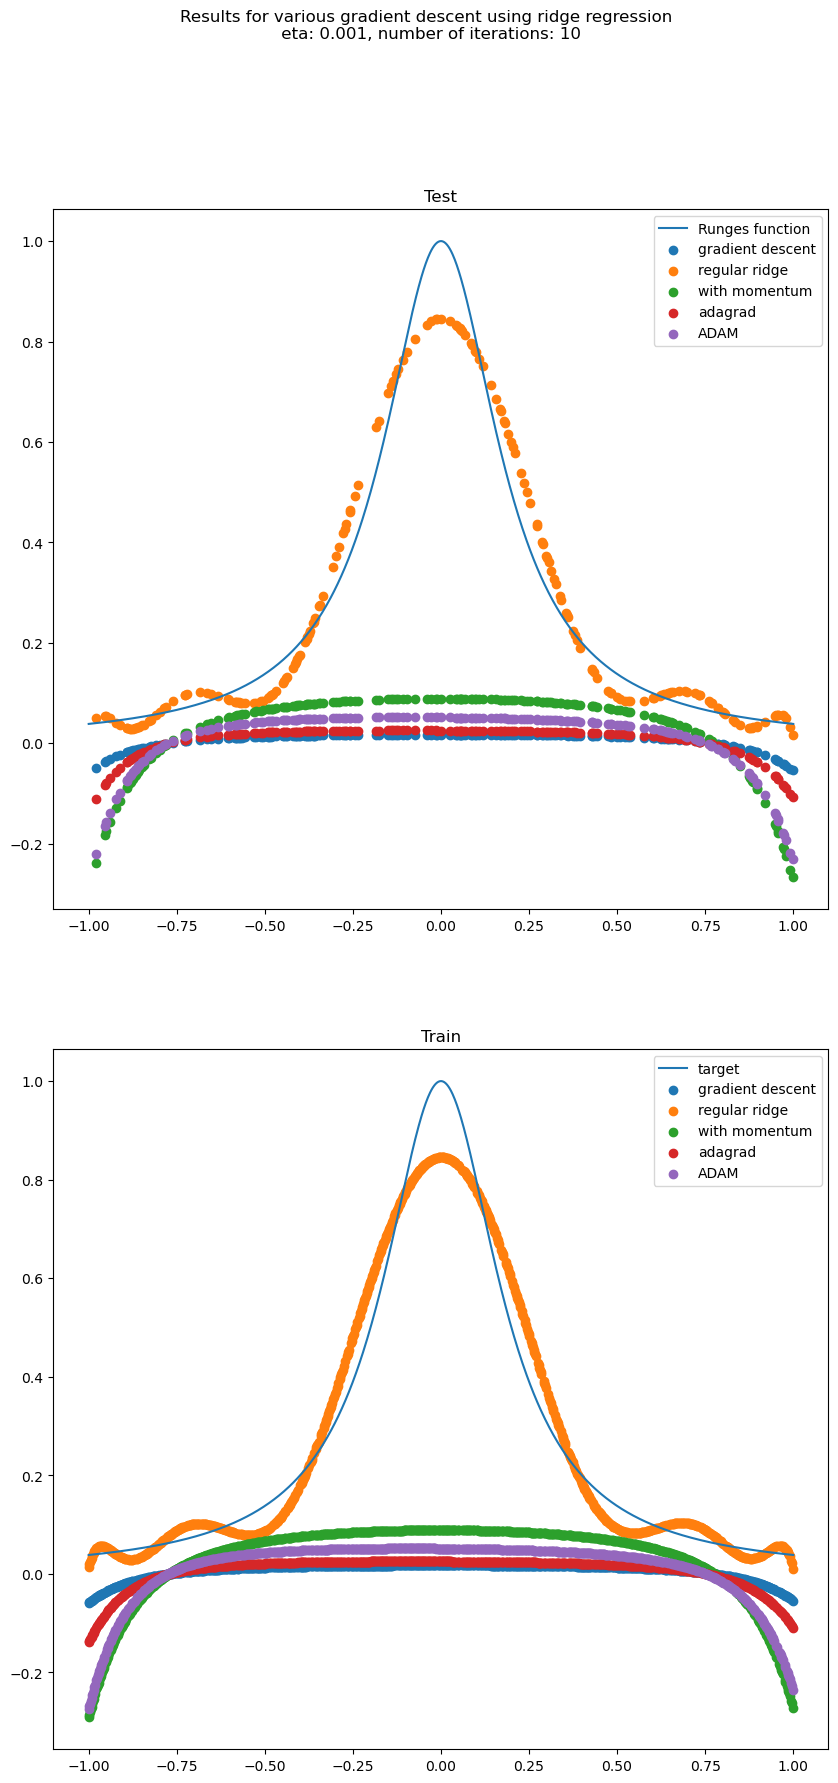

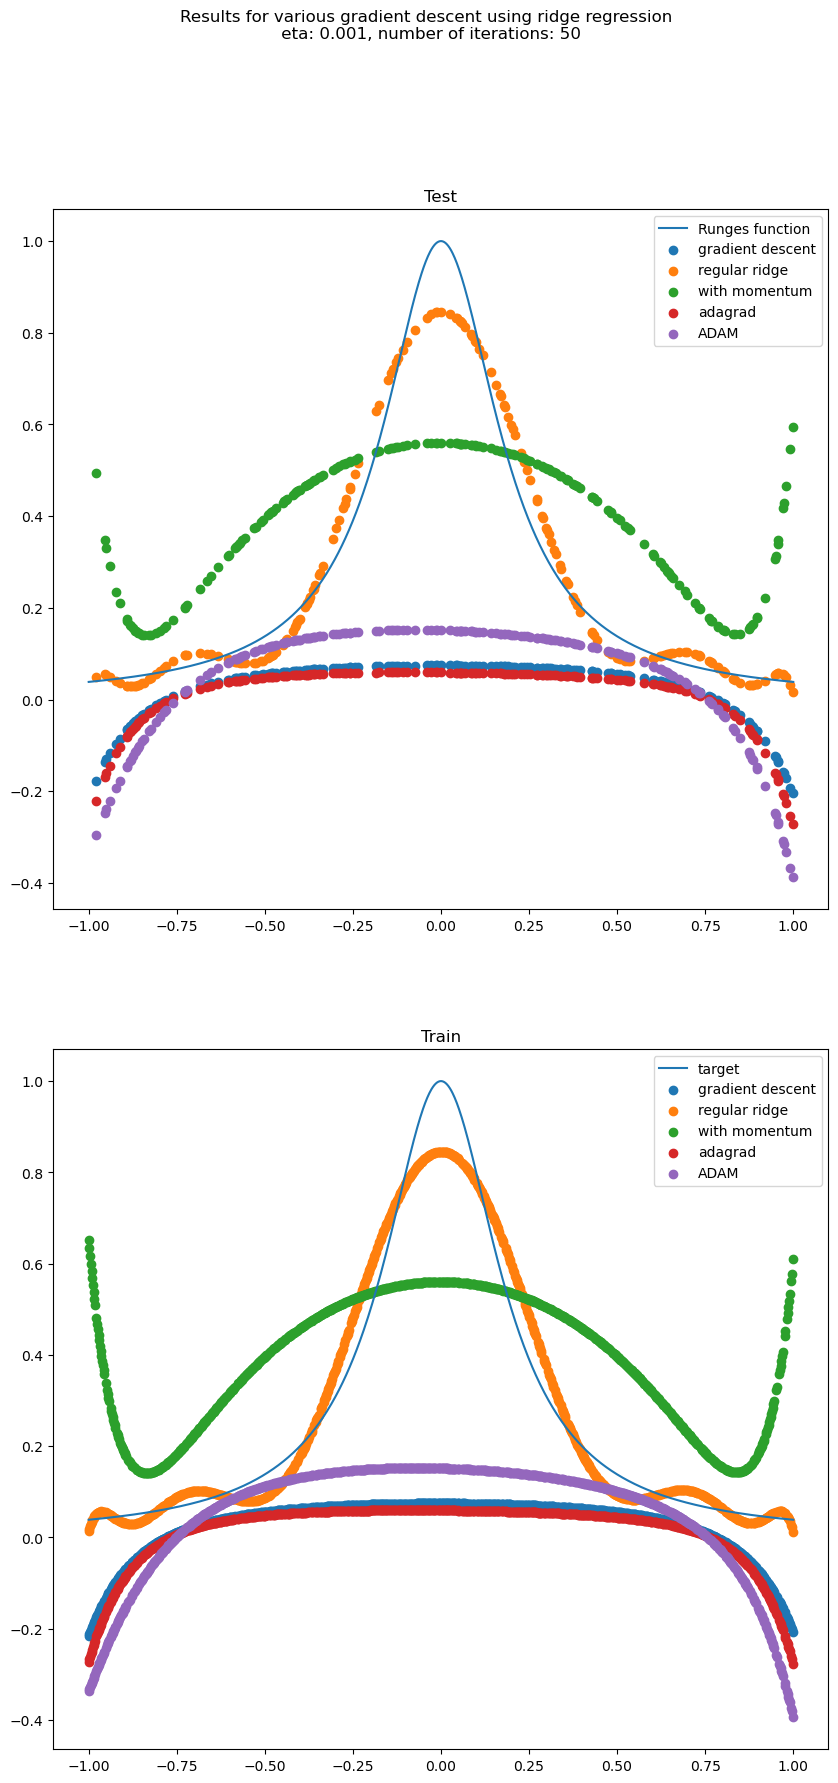

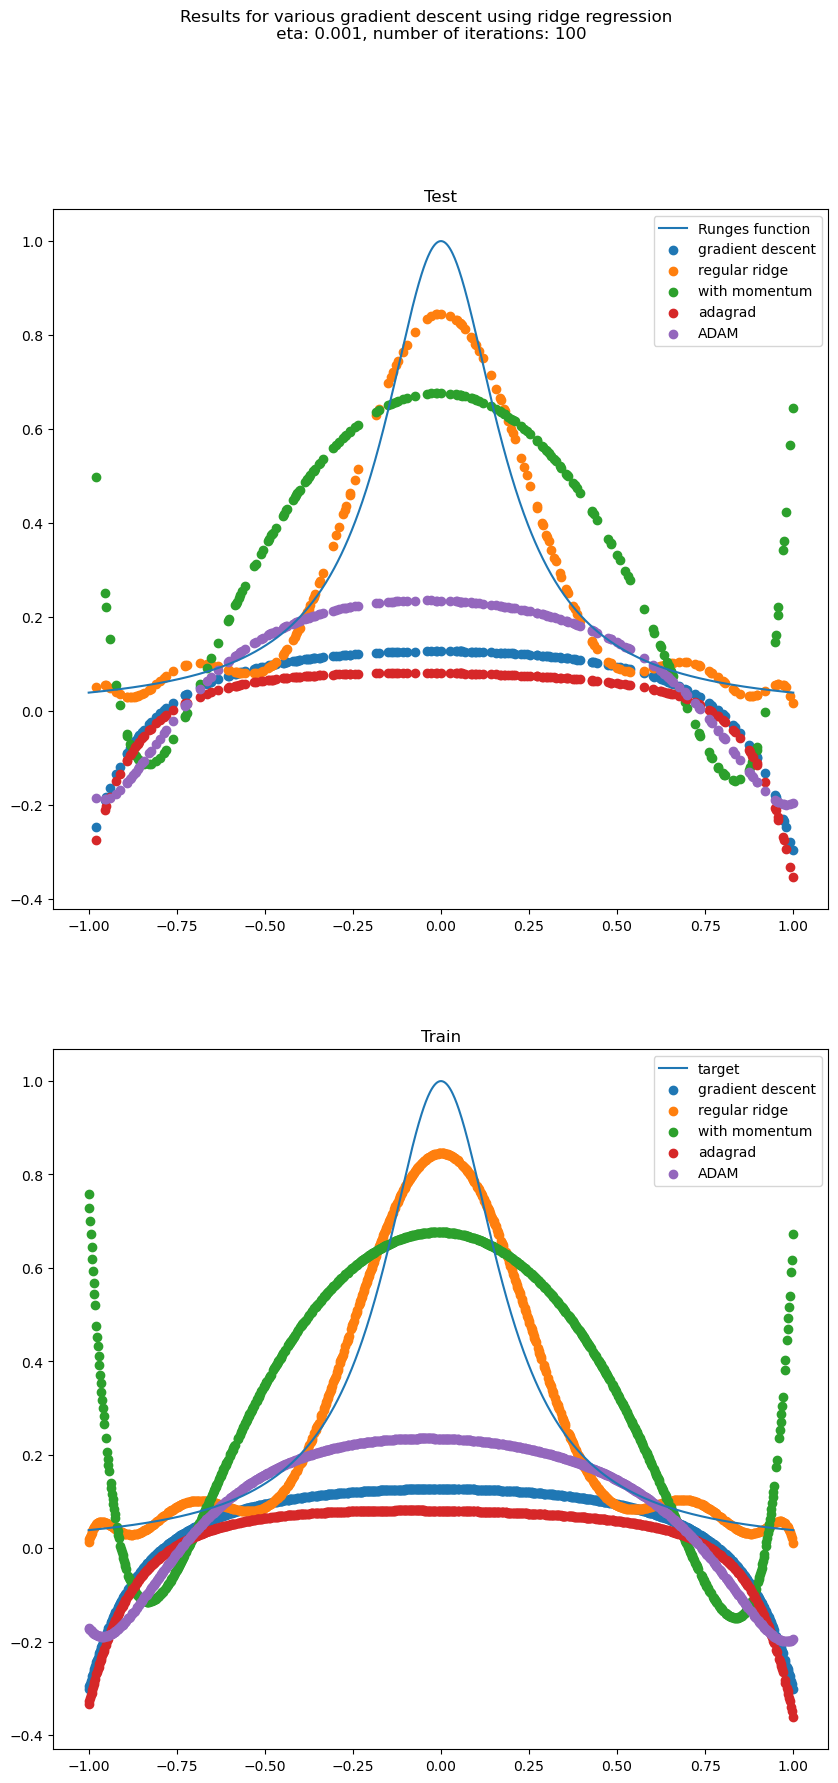

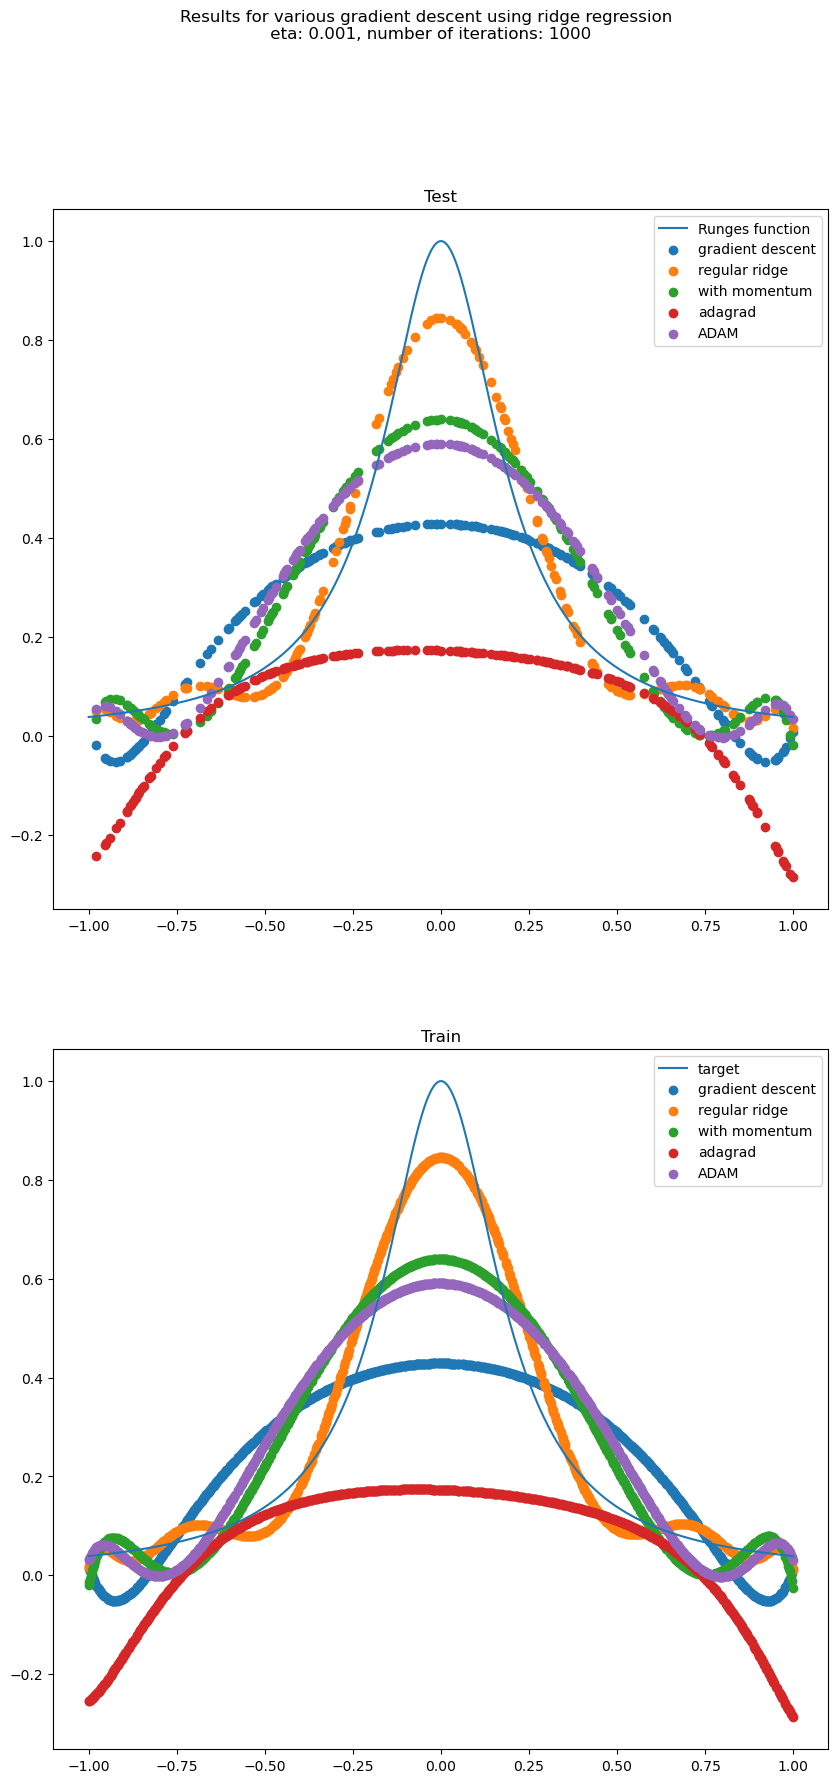

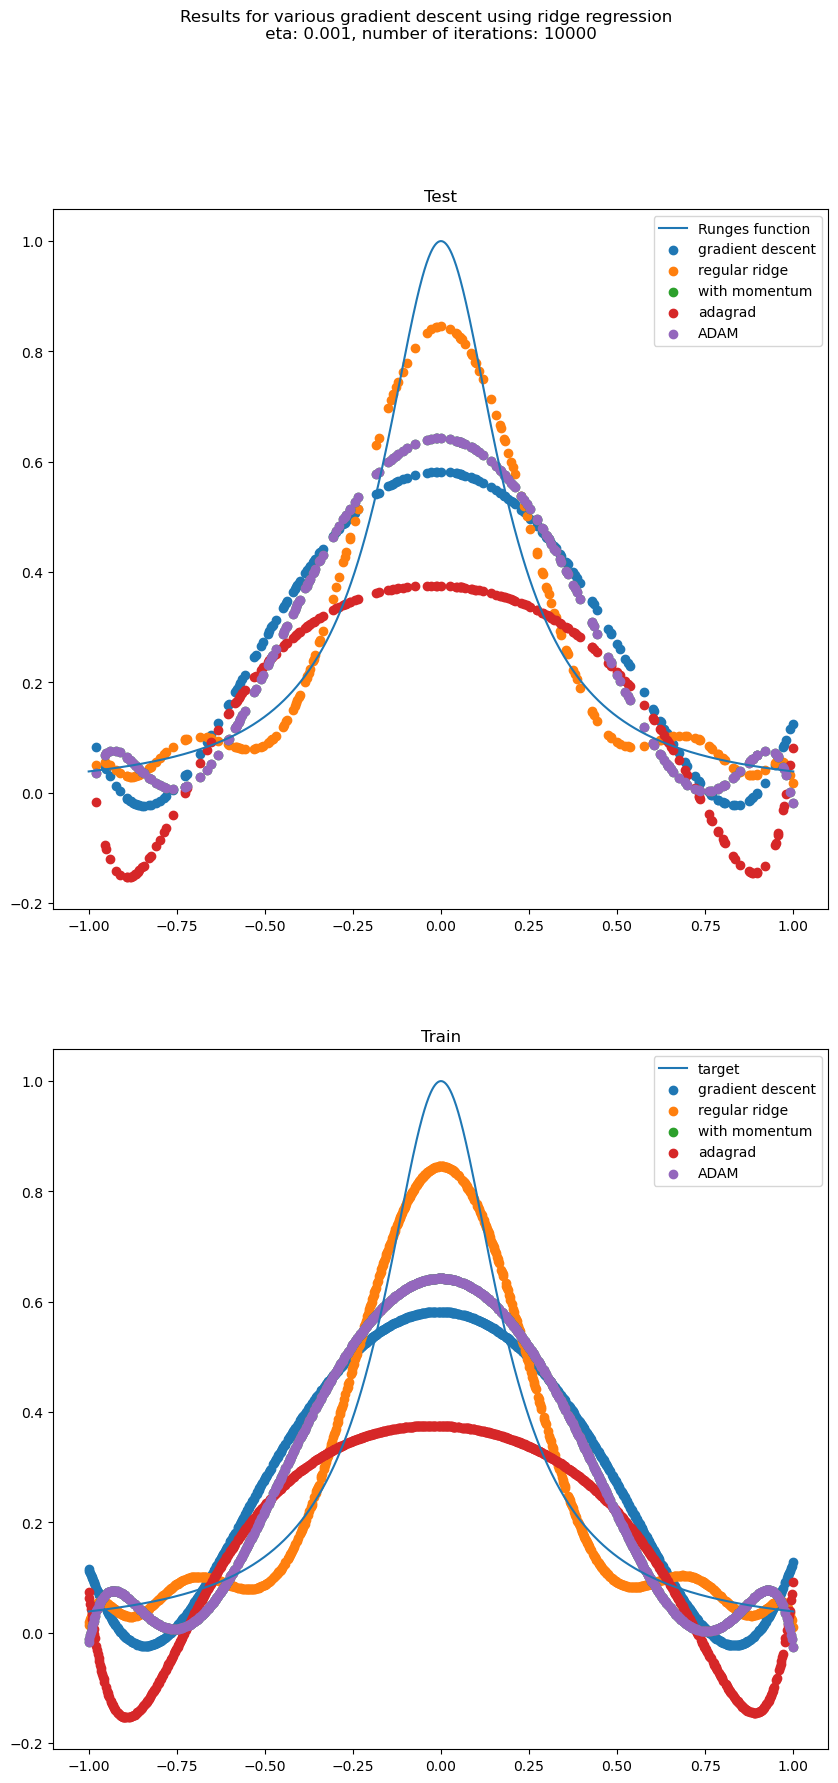

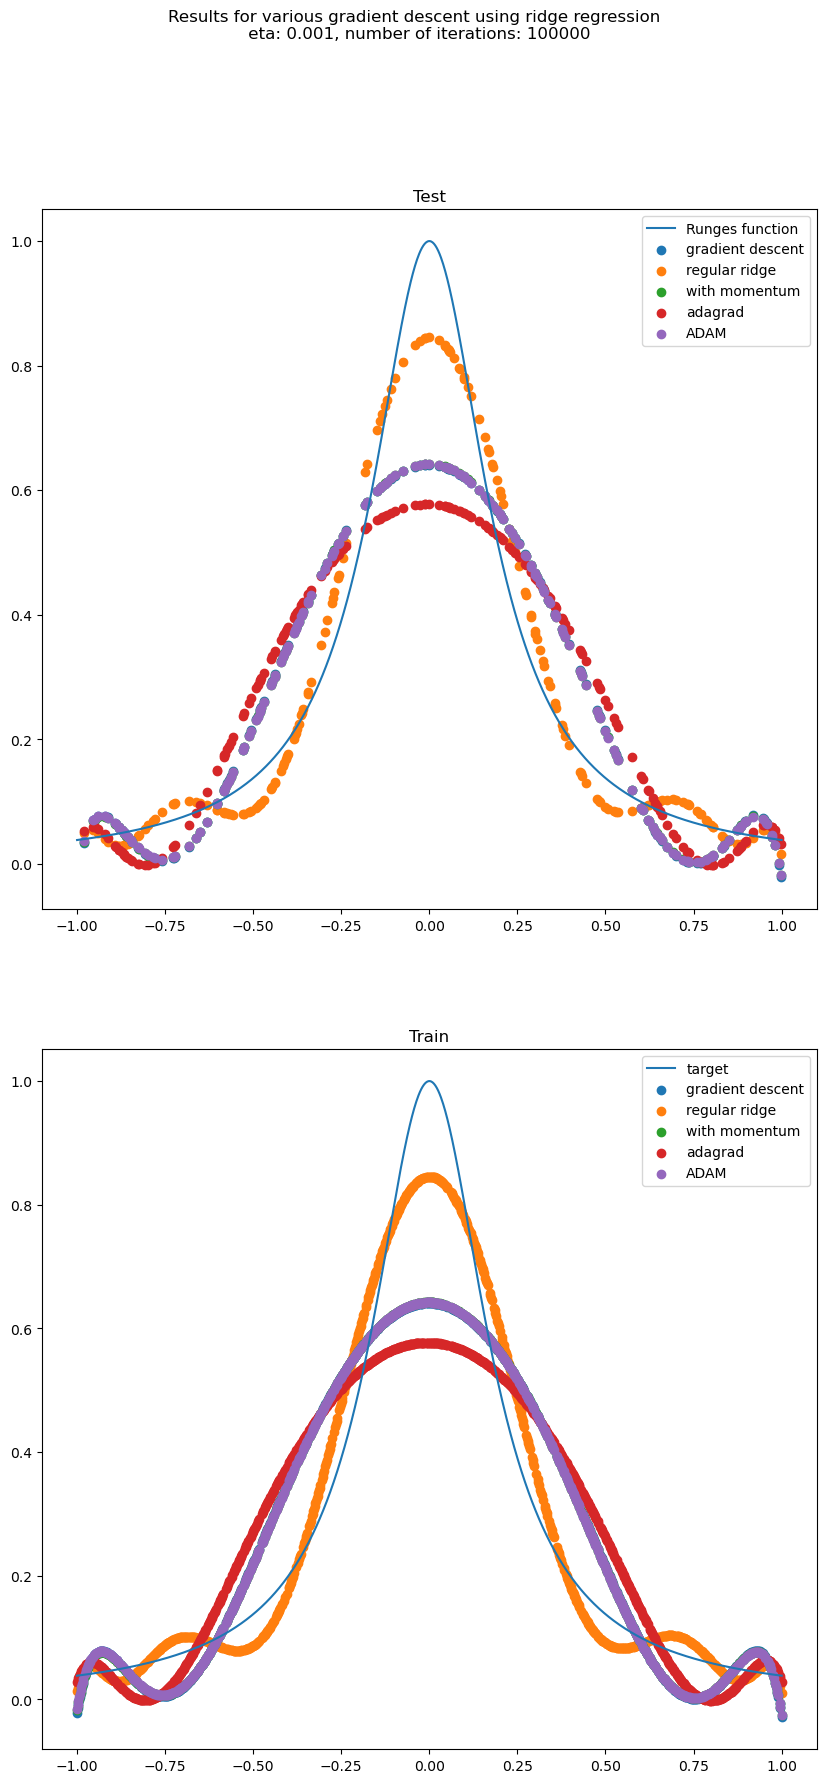

In [25]:
explore_iterations_GD_methods_ridge(iter_list,eta,lam,
                                    x,y,
                                    x_train,x_test,
                                    X_train_scaled,X_test_scaled,
                                    y_train)

In [ ]:
eta = 0.001
lam = 0.01
size_minibatch = 10
num_points = len(X_train)
num_epochs = [10,50,100,1000,10000,100000]

explore_n_epochs_stochasticGD_ridge(num_epochs,num_points,size_minibatch,eta,lam,x,y,x_train,x_test,X_train_scaled,X_test_scaled,y_train)


KeyboardInterrupt: 

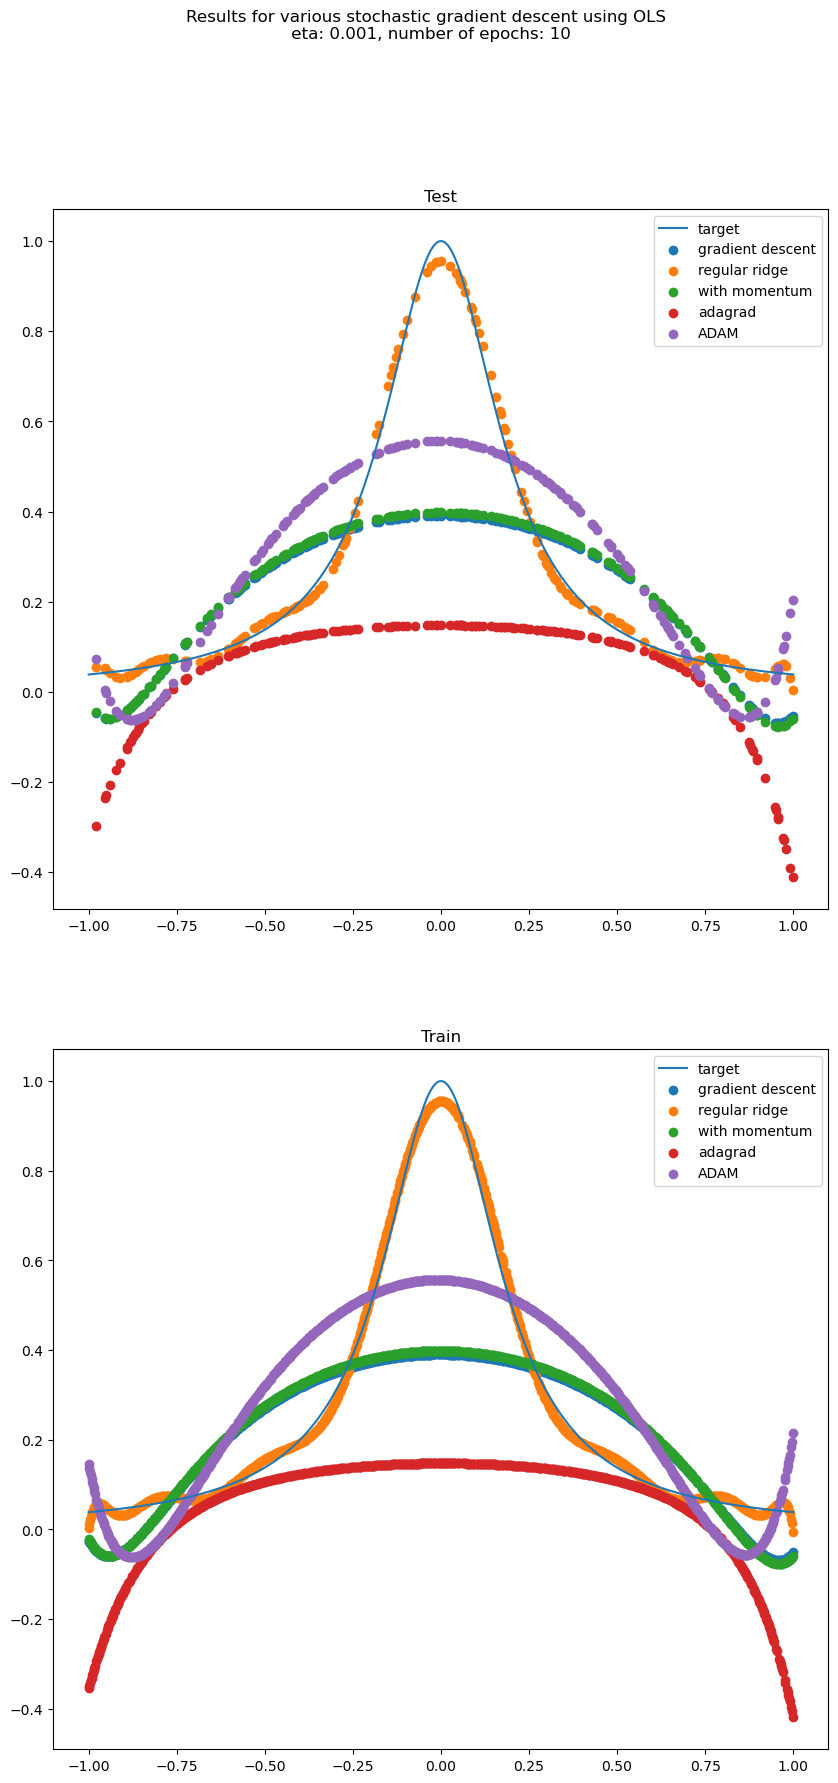

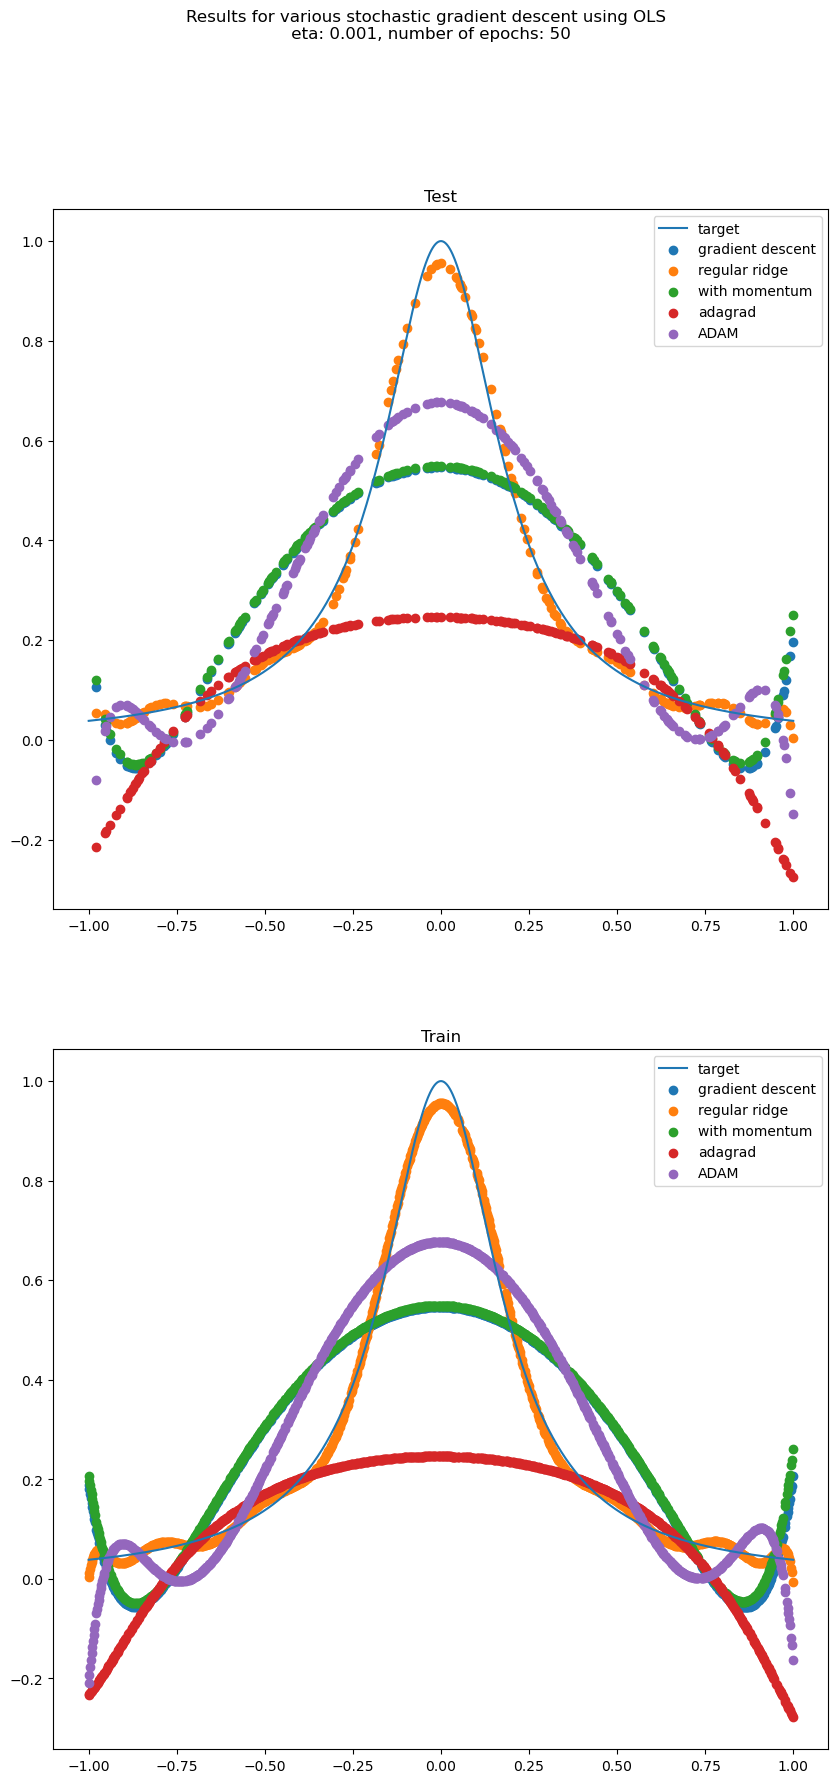

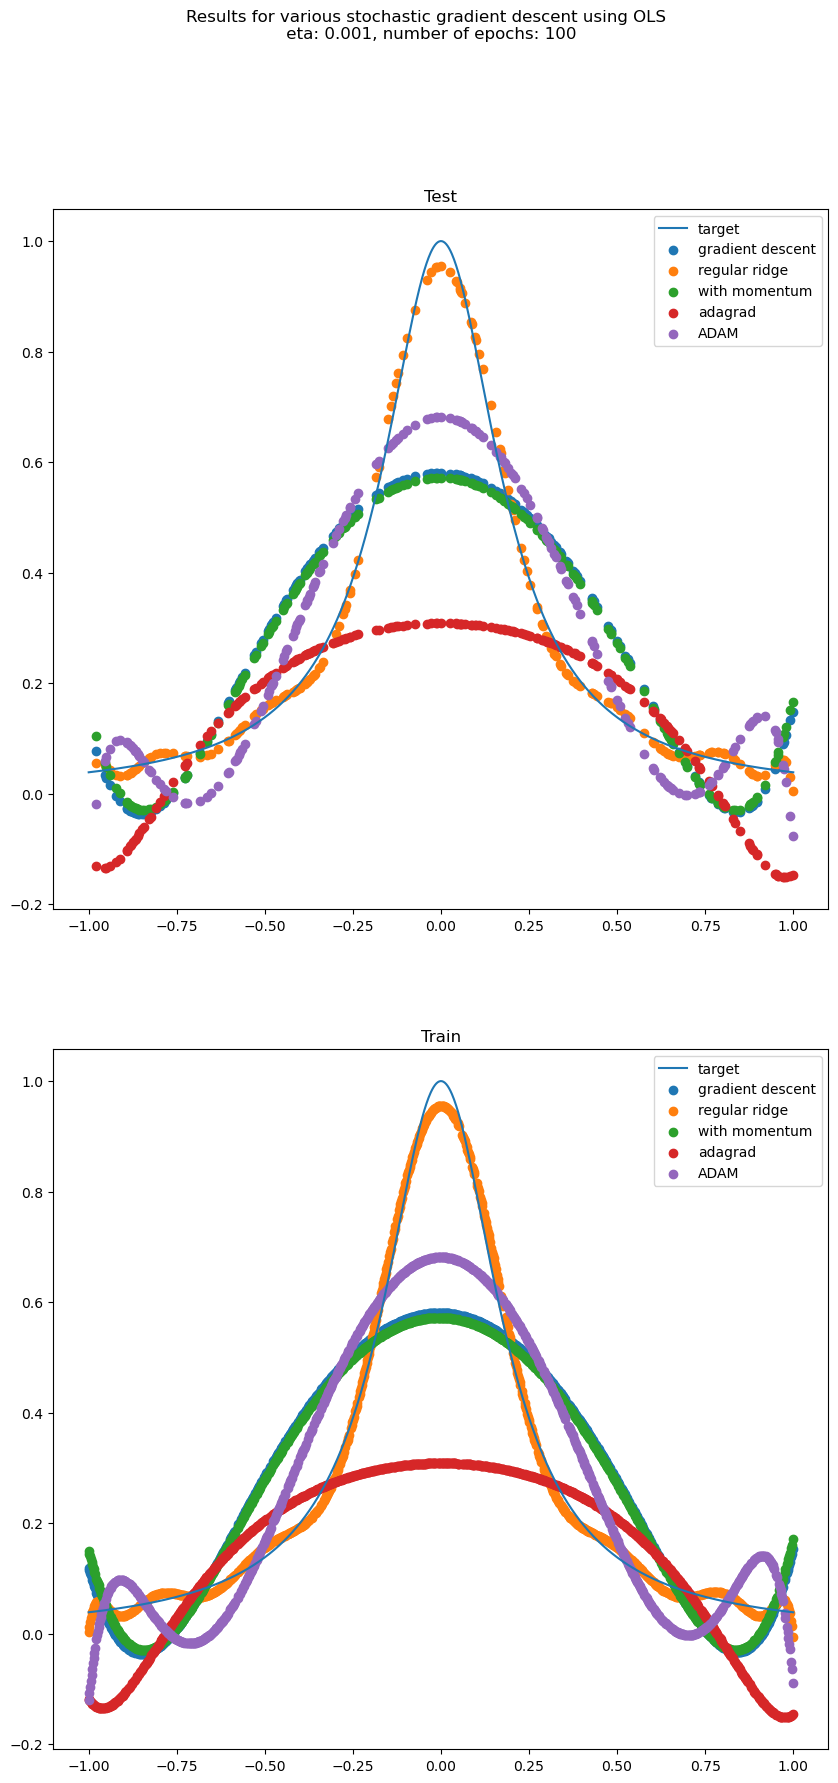

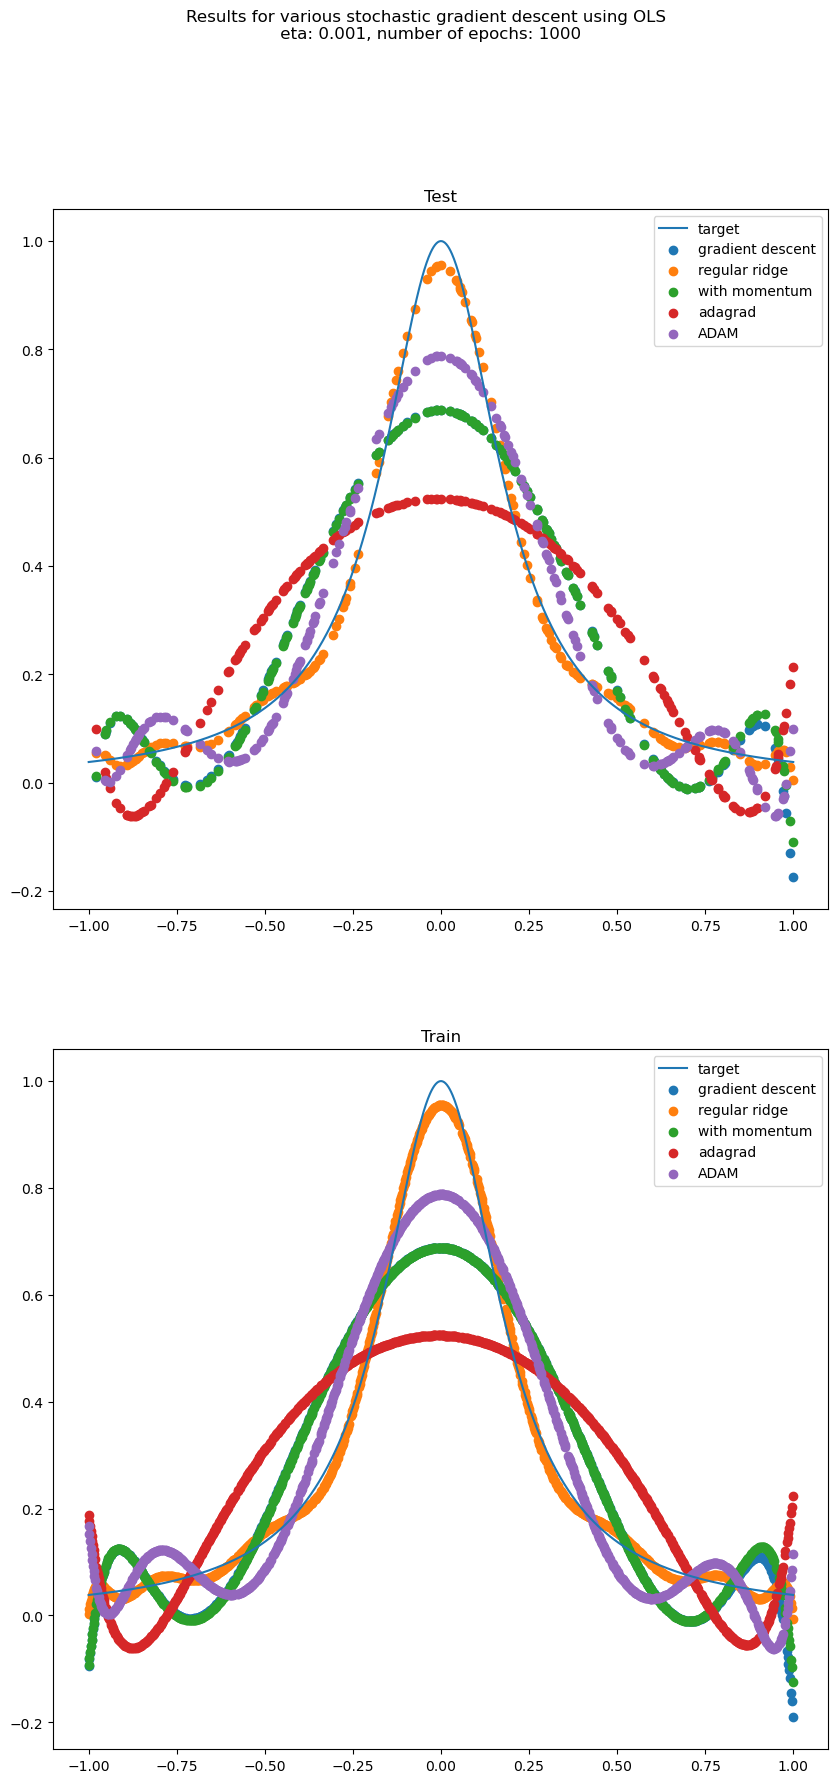

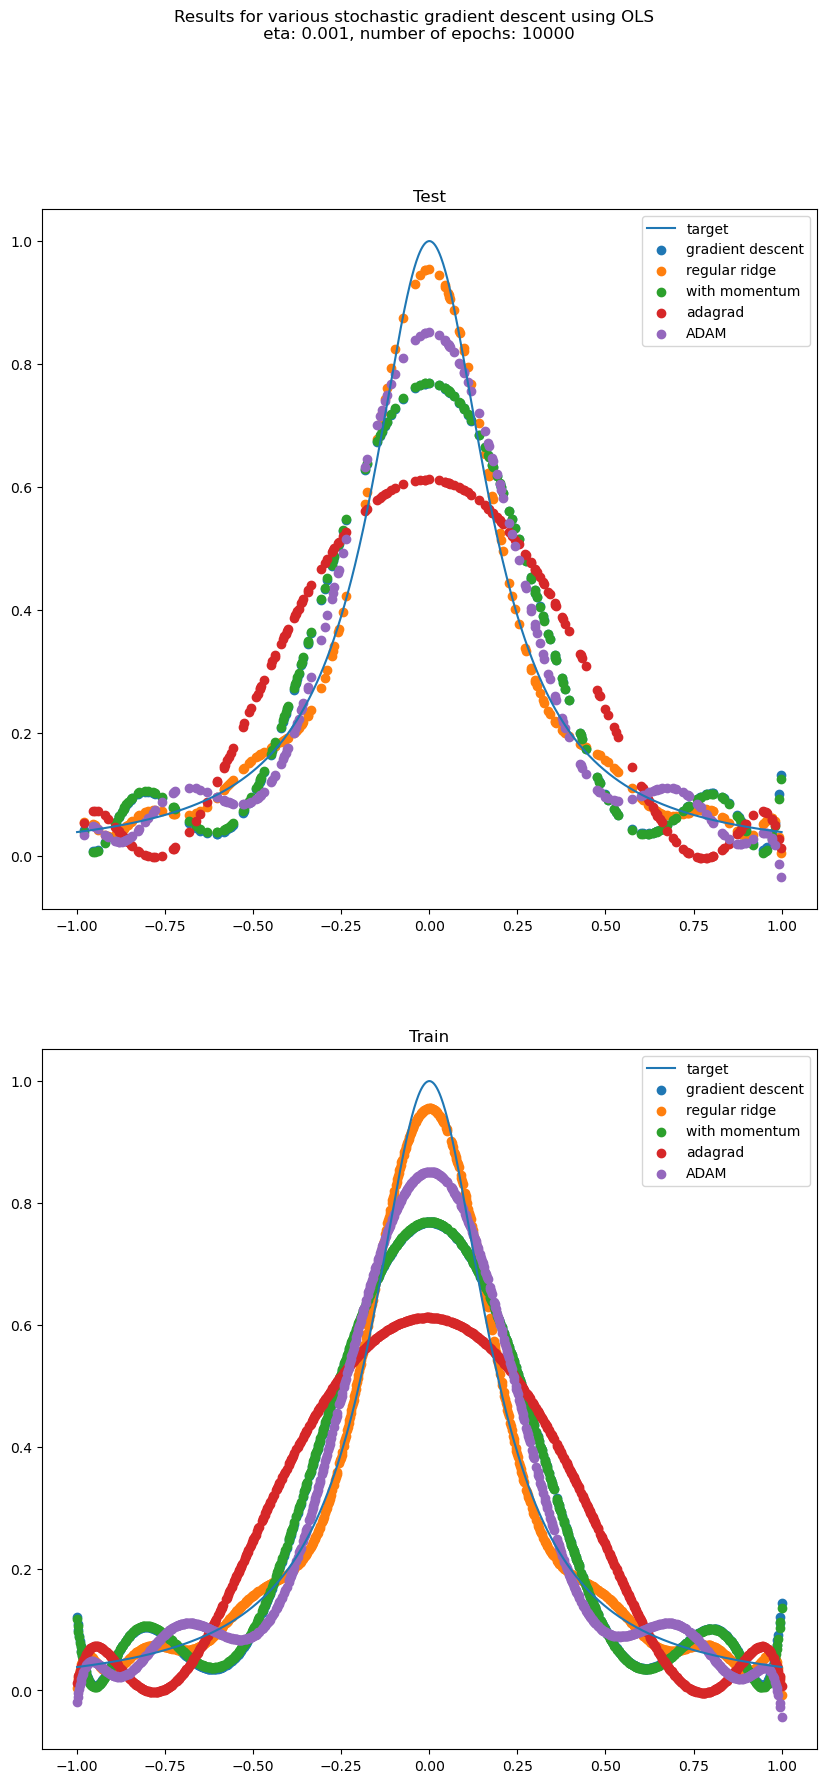

In [14]:

explore_n_epochs_stochasticGD_OLS(num_epochs,num_points,size_minibatch,eta,x,y,x_train,x_test,X_train_scaled,X_test_scaled,y_train)
